In [171]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [172]:
import matplotlib as mpl
 
mpl.rc('font', family='NanumBarunGothic')

In [173]:
df = pd.read_csv("../data/BC_Card_edit.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519297 entries, 0 to 519296
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   기준년월        519297 non-null  int64 
 1   품목대분류코드     519297 non-null  int64 
 2   품목대분류명      519297 non-null  object
 3   품목중분류코드     519297 non-null  int64 
 4   품목중분류명      519297 non-null  object
 5   성별          519297 non-null  object
 6   연령          519297 non-null  object
 7   가구생애주기      519297 non-null  object
 8   고객소재지_광역시도  519297 non-null  object
 9   고객소재지_시군구   519297 non-null  object
 10  고객소재지_읍면동   519297 non-null  object
 11  매출금액        519297 non-null  int64 
 12  매출건수        519297 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 51.5+ MB
None


,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58


In [174]:
df = df[df['고객소재지_광역시도'] == '서울특별시']
df_1903 = df[df['기준년월'] == 201903]
df_1903.head(10)

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58
5,201903,12,뷰티,1210,스킨케어,남성,50대,성인자녀가구,서울특별시,강동구,길동,874323,8
6,201903,12,뷰티,1212,바디케어,남성,40대,초중고자녀가구,서울특별시,강동구,길동,444666,13
7,201903,10,의류,1010,여성의류,여성,40대,신혼영유아가구,서울특별시,강동구,길동,1048087,17
8,201903,15,전자,1510,가전,여성,20대,1인가구,서울특별시,강동구,길동,2429276,17
9,201903,18,건강,1810,건강식품,남성,40대,초중고자녀가구,서울특별시,강동구,길동,529505,17


In [175]:
sigoongu = list(set(df_1903['고객소재지_시군구']))
print(len(sigoongu))

big_category = list(set(df_1903['품목대분류명']))
print(len(big_category))

middle_category = list(set(df_1903['품목중분류명']))
print(len(middle_category))

lifestyle = list(set(df_1903['가구생애주기']))
print(len(lifestyle))

25
13
49
5


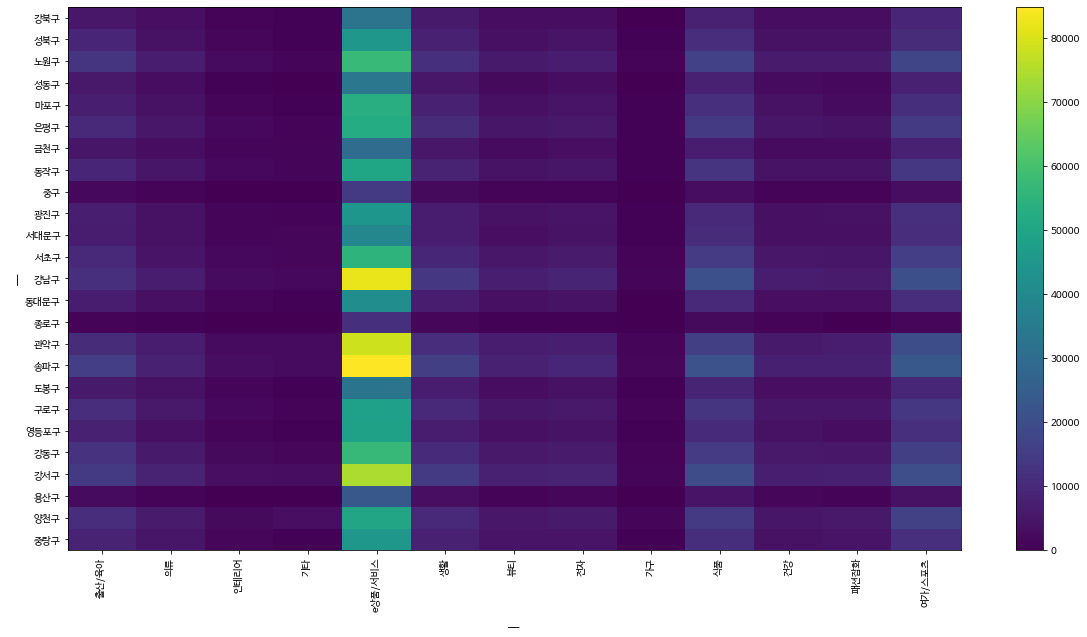

In [176]:
# 시군구 - 매출건수
pack = []
for gu in sigoongu:
    temp = df_1903[df_1903['고객소재지_시군구'] == gu]
    title = list(set(temp['품목대분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목대분류명']==t]

        count = temp_b['매출건수'].sum()
        title_count[t] = count
    pack.append(title_count)

sigoongu_moneycount_large = pd.DataFrame(pack, index=sigoongu)
sigoongu_moneycount_large = sigoongu_moneycount_large.fillna(0)
plt.figure(figsize=(20,10))
plt.pcolor(sigoongu_moneycount_large)
plt.xticks(np.arange(0.5, len(sigoongu_moneycount_large.columns), 1), sigoongu_moneycount_large.columns, rotation=90)
plt.yticks(np.arange(0.5, len(sigoongu_moneycount_large.index), 1), sigoongu_moneycount_large.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()

In [177]:
sigoongu_moneycount_large.head()

,출산/육아,의류,인테리어,기타,e상품/서비스,생활,뷰티,전자,가구,식품,건강,패션잡화,여가/스포츠
중랑구,7980,4927,1495,472,45022,7810,4487,4440,565.0,11032,3868,4386,11452
양천구,10846,6144,2224,3308,49744,9386,5209,5898,1284.0,13955,4823,5393,16479
용산구,2414,873,327,75,23020,3304,891,1359,55.0,4520,1443,758,3670
강서구,14222,8243,3144,2922,74363,14569,7661,7980,1257.0,19402,7057,7353,20153
강동구,12222,5896,2009,1549,56883,10260,5336,5995,811.0,14850,5497,5267,15612


In [178]:
# 클러스터링
# 시군구 - 매출건수

import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

datapoints = sigoongu_moneycount_large.values
kmeans = KMeans(n_clusters=5).fit(datapoints)

sigoongu_moneycount_large['cluster_id'] = kmeans.labels_
for i in range(5):
    temp = sigoongu_moneycount_large[sigoongu_moneycount_large['cluster_id'] == i]
    print(temp['cluster_id'])

중랑구     0
영등포구    0
동대문구    0
서대문구    0
광진구     0
성북구     0
Name: cluster_id, dtype: int32
강서구    1
송파구    1
관악구    1
강남구    1
Name: cluster_id, dtype: int32
용산구    2
종로구    2
중구     2
Name: cluster_id, dtype: int32
양천구    3
강동구    3
구로구    3
서초구    3
동작구    3
은평구    3
마포구    3
노원구    3
Name: cluster_id, dtype: int32
도봉구    4
금천구    4
성동구    4
강북구    4
Name: cluster_id, dtype: int32


In [203]:
# 데이터 프레임 재구성
dict = {}
sigoongu_name = sigoongu_moneycount_large.index
cluster_label = sigoongu_moneycount_large['cluster_id'].tolist()

for i in range(25):
    dict[sigoongu_name[i]] = cluster_label[i]

temp = []
for index, row in df_1903.iterrows():
    temp_dict = row.to_dict()
    temp_dict['large_moneycount_cluster'] = dict[row['고객소재지_시군구']]
    temp.append(temp_dict)
df_1903 = pd.DataFrame(temp)

In [204]:
df_1903[df_1903['large_moneycount_cluster'] == 1].head(10)

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수,large_moneycount_cluster
193,201903,12,뷰티,1215,뷰티소품,남성,30대,신혼영유아가구,서울특별시,송파구,가락동,574676,13,1
194,201903,14,인테리어,1410,침구/수예,남성,40대,신혼영유아가구,서울특별시,송파구,가락동,1074476,13,1
195,201903,11,패션잡화,1112,가방,여성,40대,초중고자녀가구,서울특별시,송파구,가락동,1069765,17,1
196,201903,16,식품,1612,음료,여성,20대,신혼영유아가구,서울특별시,송파구,가락동,527962,17,1
197,201903,17,생활,1711,자동차,여성,40대,초중고자녀가구,서울특별시,송파구,가락동,1183246,17,1
198,201903,10,의류,1012,남성의류,여성,40대,초중고자녀가구,서울특별시,송파구,가락동,1062678,21,1
199,201903,15,전자,1511,디지털,여성,50대,성인자녀가구,서울특별시,송파구,가락동,2691923,21,1
200,201903,10,의류,1012,남성의류,남성,30대,신혼영유아가구,서울특별시,송파구,가락동,957182,21,1
201,201903,14,인테리어,1410,침구/수예,여성,50대,성인자녀가구,서울특별시,송파구,가락동,1017111,21,1
202,201903,11,패션잡화,1111,신발,남성,20대,1인가구,서울특별시,송파구,가락동,1381231,21,1


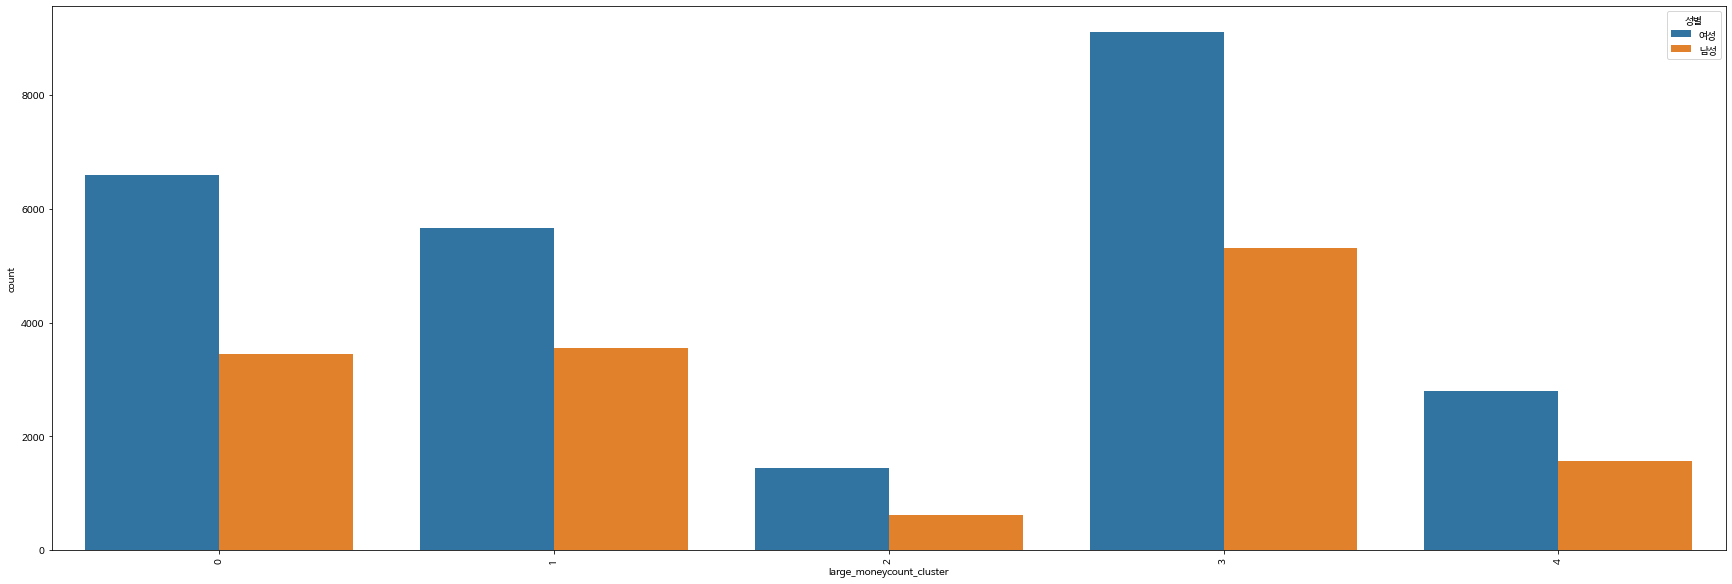

In [205]:
plt.figure(figsize=(30,10))
sns.countplot(x='large_moneycount_cluster', hue = '성별', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

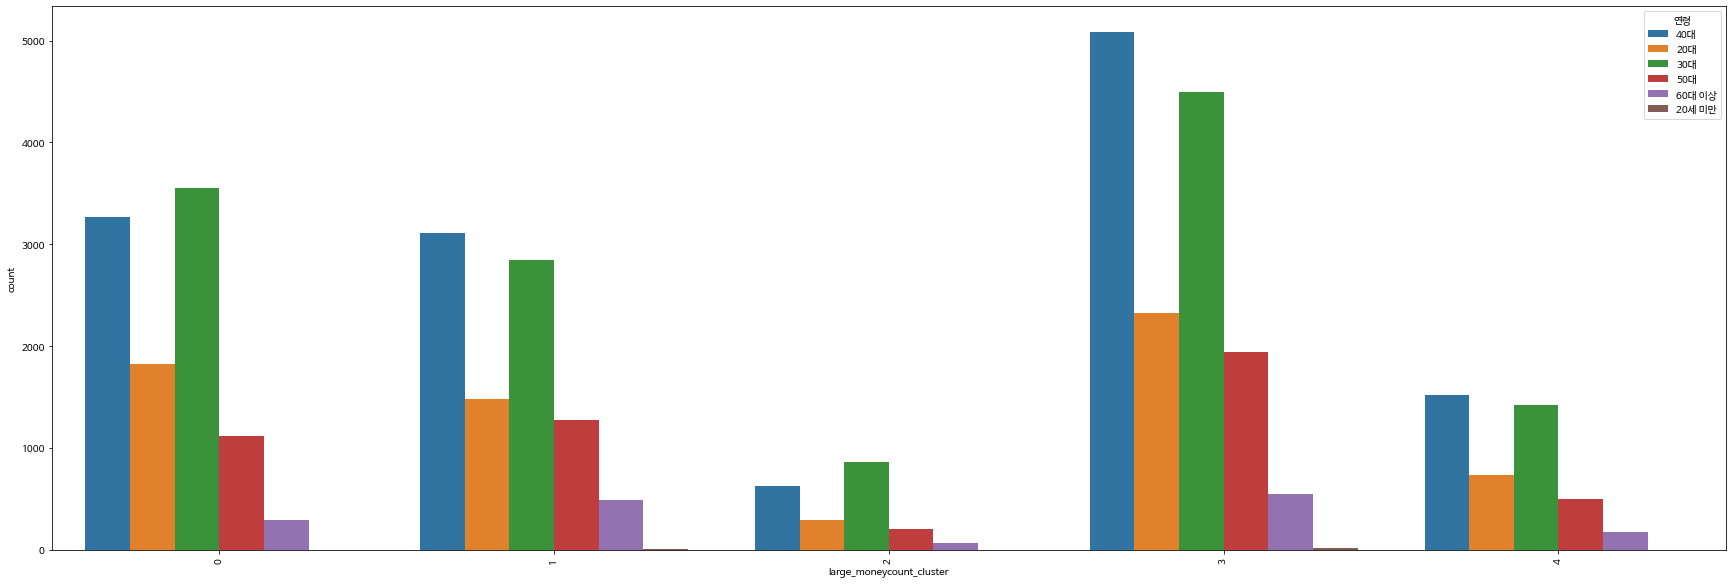

In [206]:
plt.figure(figsize=(30,10))
sns.countplot(x='large_moneycount_cluster', hue = '연령', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

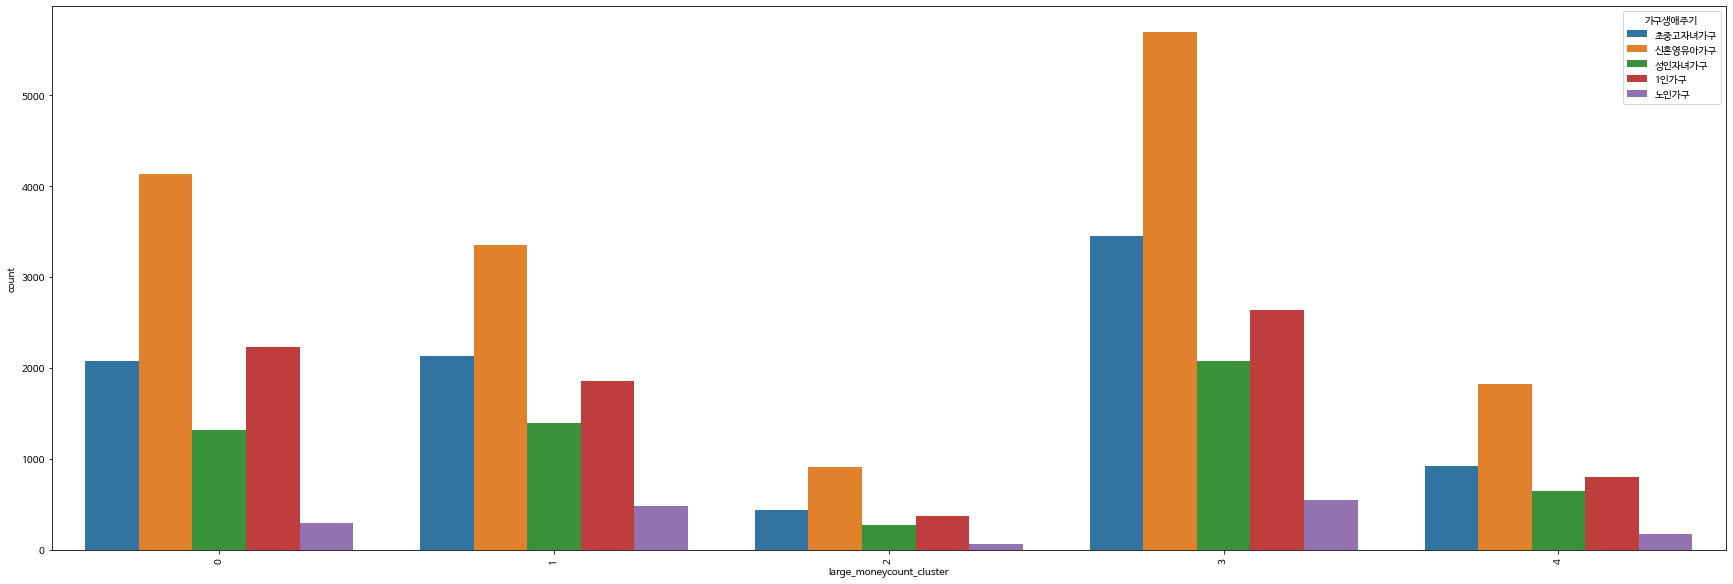

In [207]:
plt.figure(figsize=(30,10))
sns.countplot(x='large_moneycount_cluster', hue = '가구생애주기', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

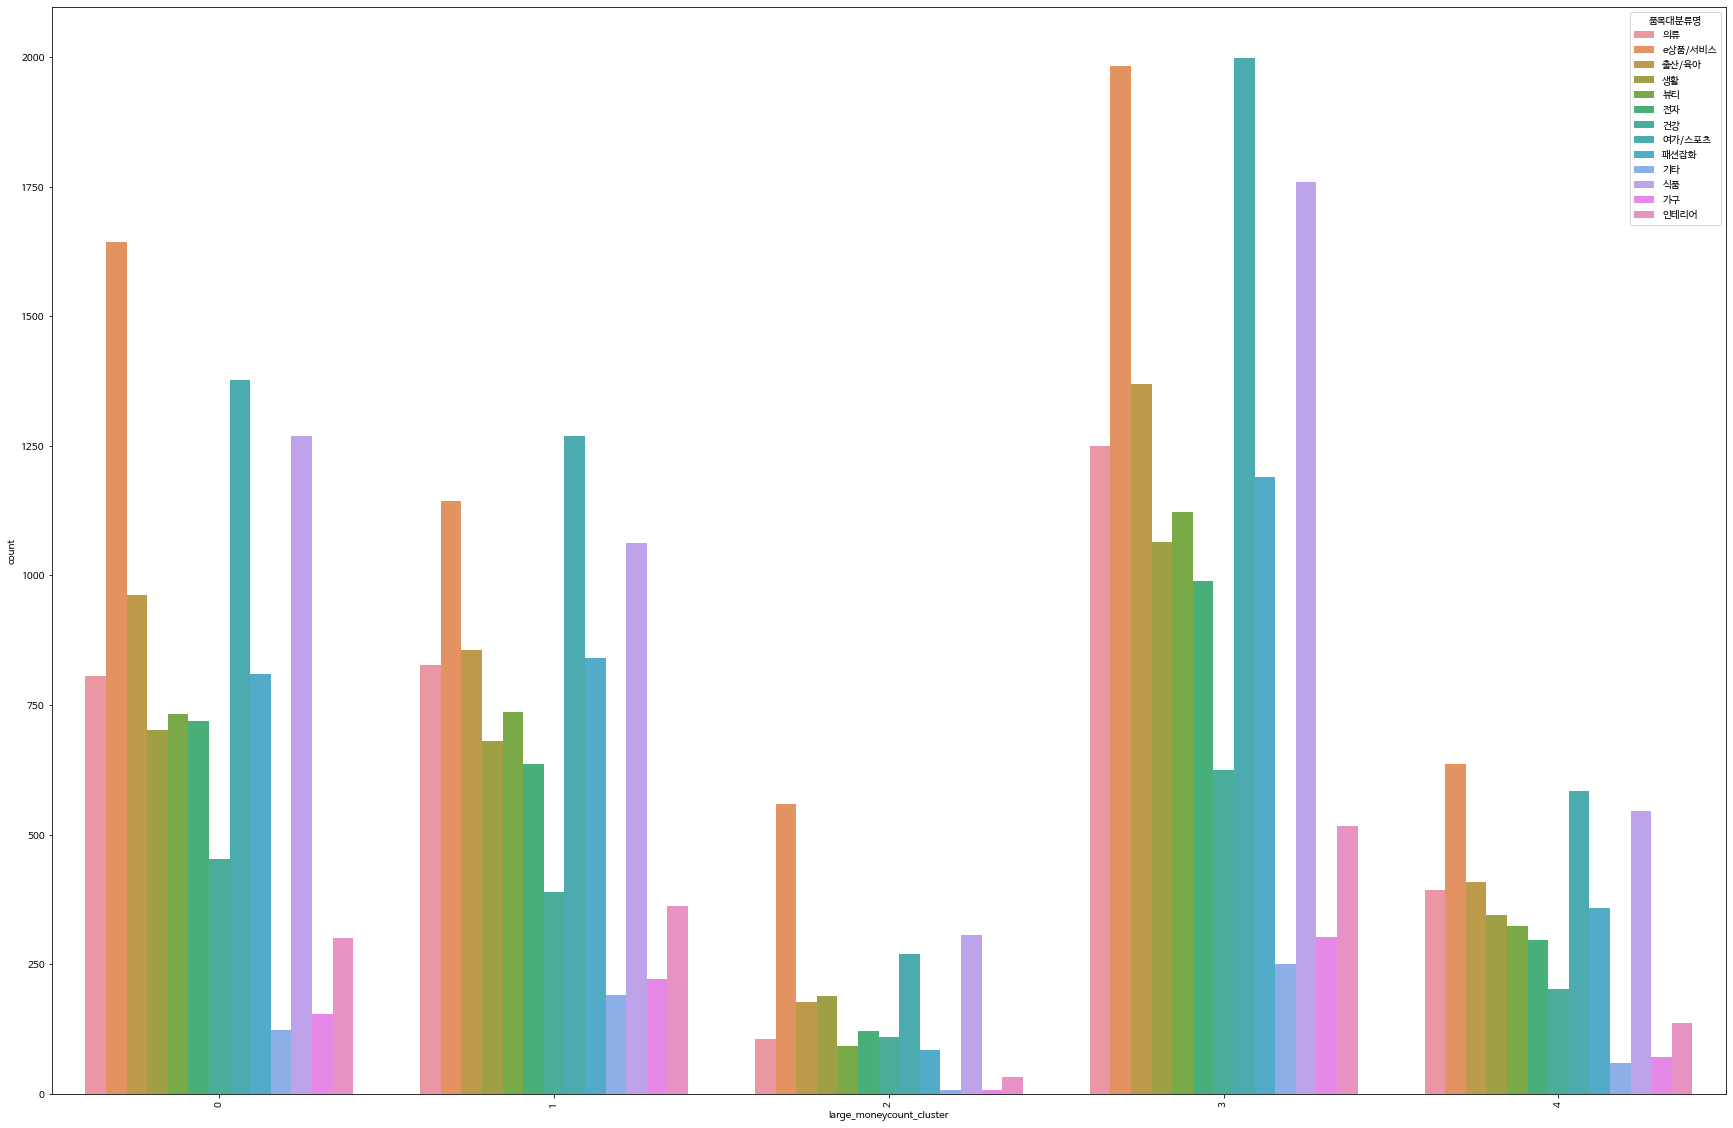

In [208]:
plt.figure(figsize=(30,20))
sns.countplot(x='large_moneycount_cluster', hue = '품목대분류명', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

In [209]:
# cluster == 0
df_1903_cluster0 = df_1903[df_1903['large_moneycount_cluster'] == 0]
cluster0_list = []
cluster0_list = df_1903_cluster0['고객소재지_시군구'].unique()

iscluster0 = []
for i in range(len(cluster0_list)):
    iscluster0.append(df_1903_cluster0['고객소재지_시군구'] == cluster0_list[i])
    
cluster0 = []
for i in range(len(cluster0_list)):
    cluster0.append(df_1903_cluster0[iscluster0[i]])

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

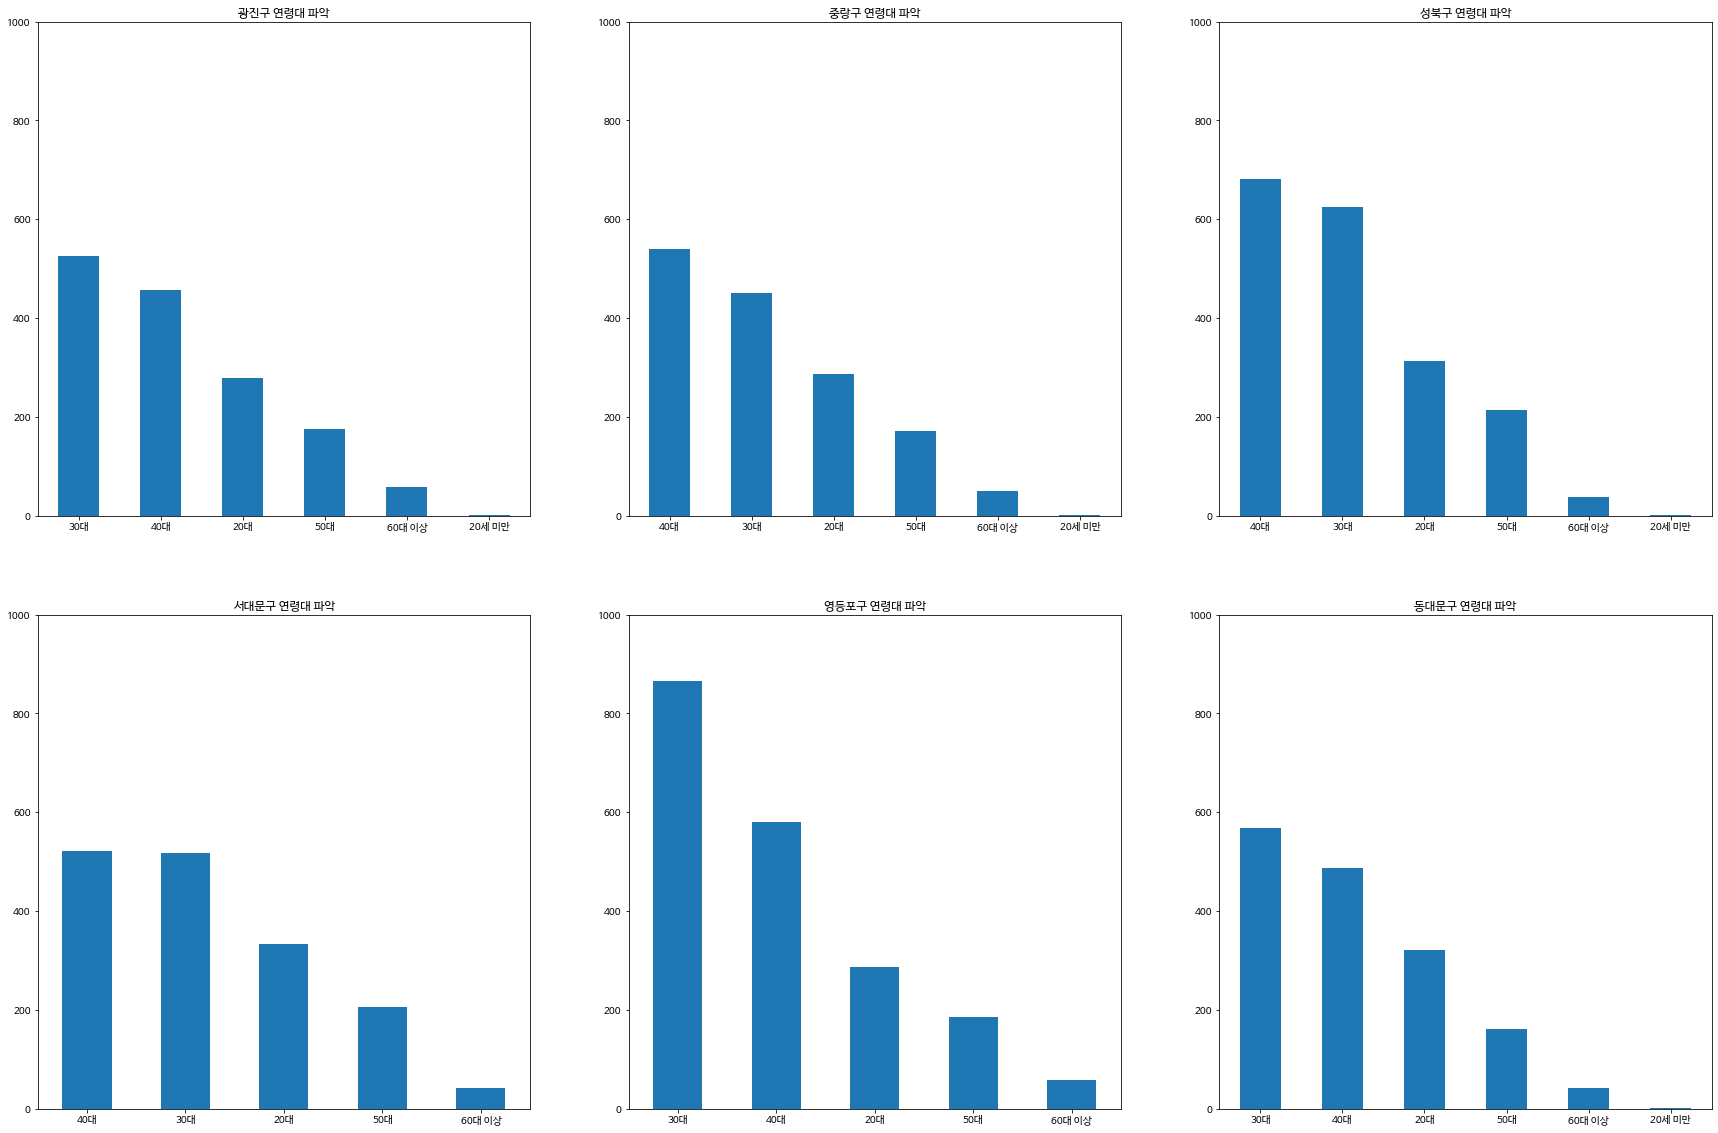

In [210]:
plt.figure(figsize = (30,20))

for j in range(len(cluster0_list)):
    plt.subplot(2,3,j+1)
    cluster0[j]['연령'].value_counts().plot.bar()
    plt.ylim([0, 1000])
    plt.xticks(rotation=0)
    plt.title(cluster0_list[j]+ ' 연령대 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

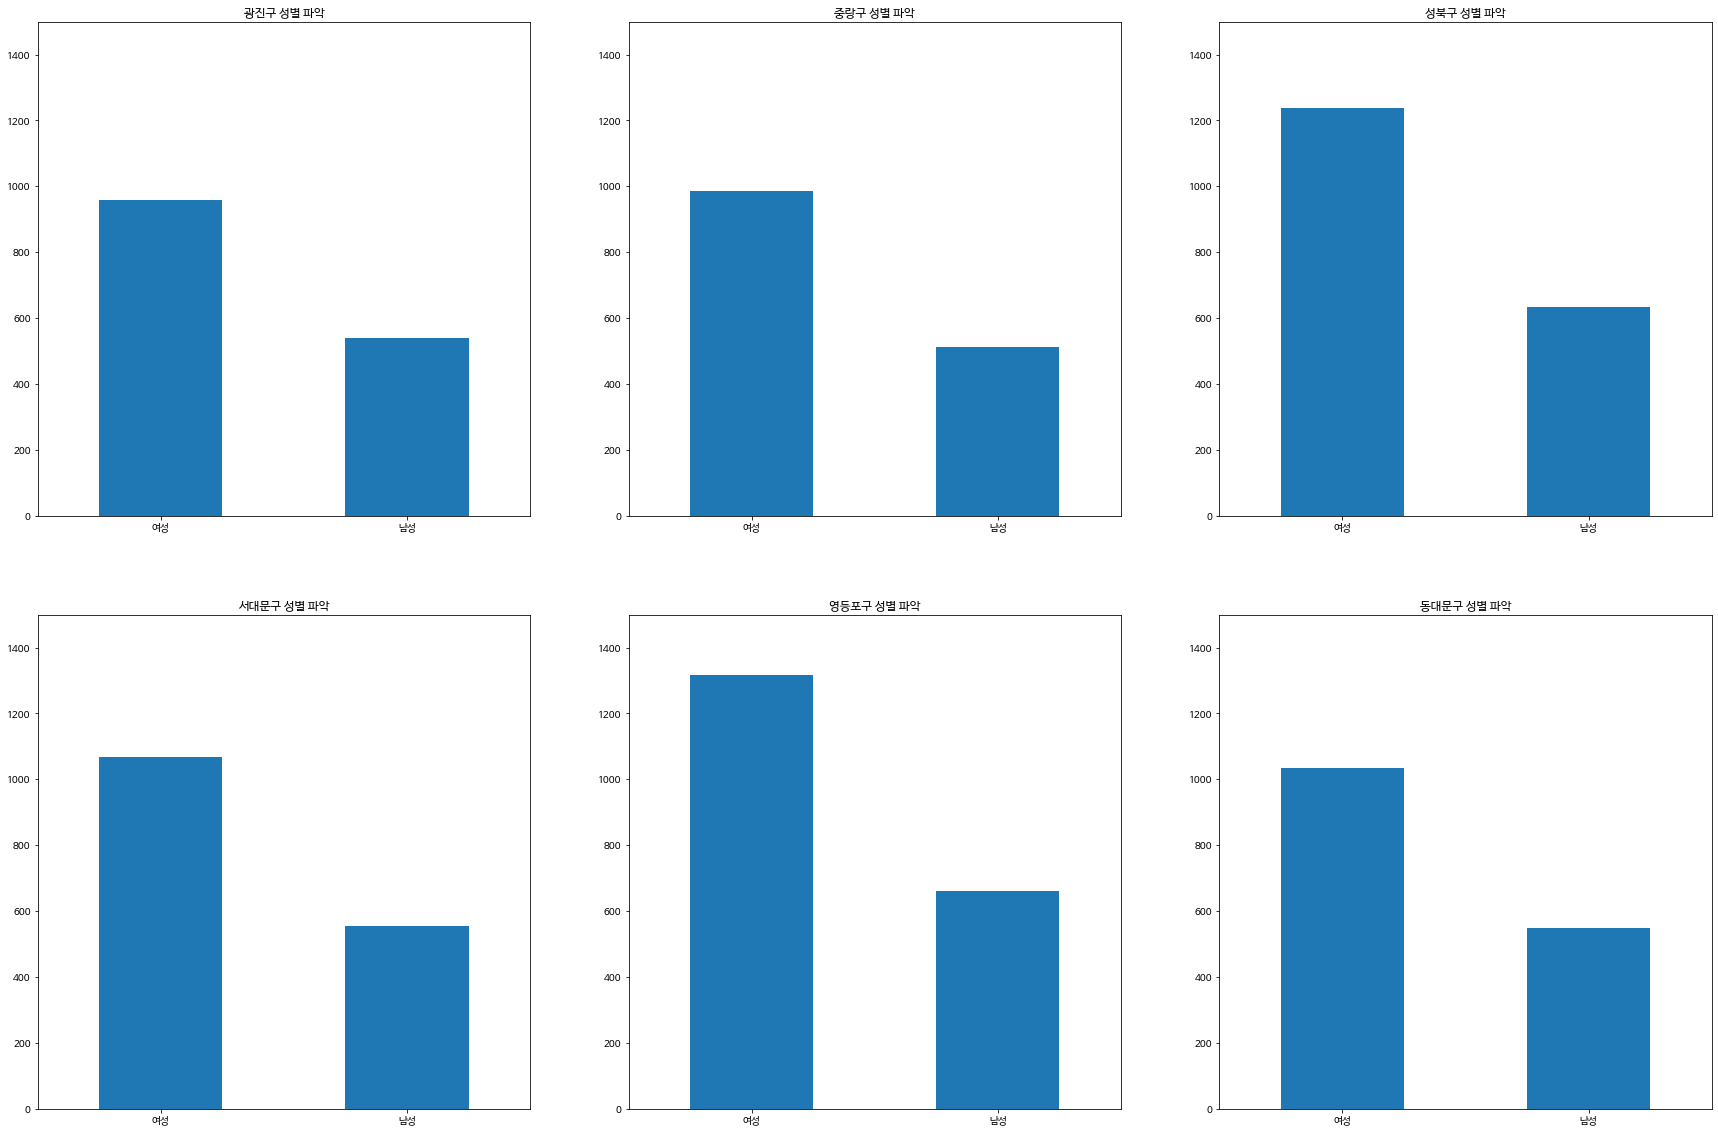

In [211]:
plt.figure(figsize = (30,20))

for j in range(len(cluster0_list)):
    plt.subplot(2,3,j+1)
    cluster0[j]['성별'].value_counts().plot.bar()
    plt.ylim([0, 1500])
    plt.xticks(rotation=0)
    plt.title(cluster0_list[j]+ ' 성별 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

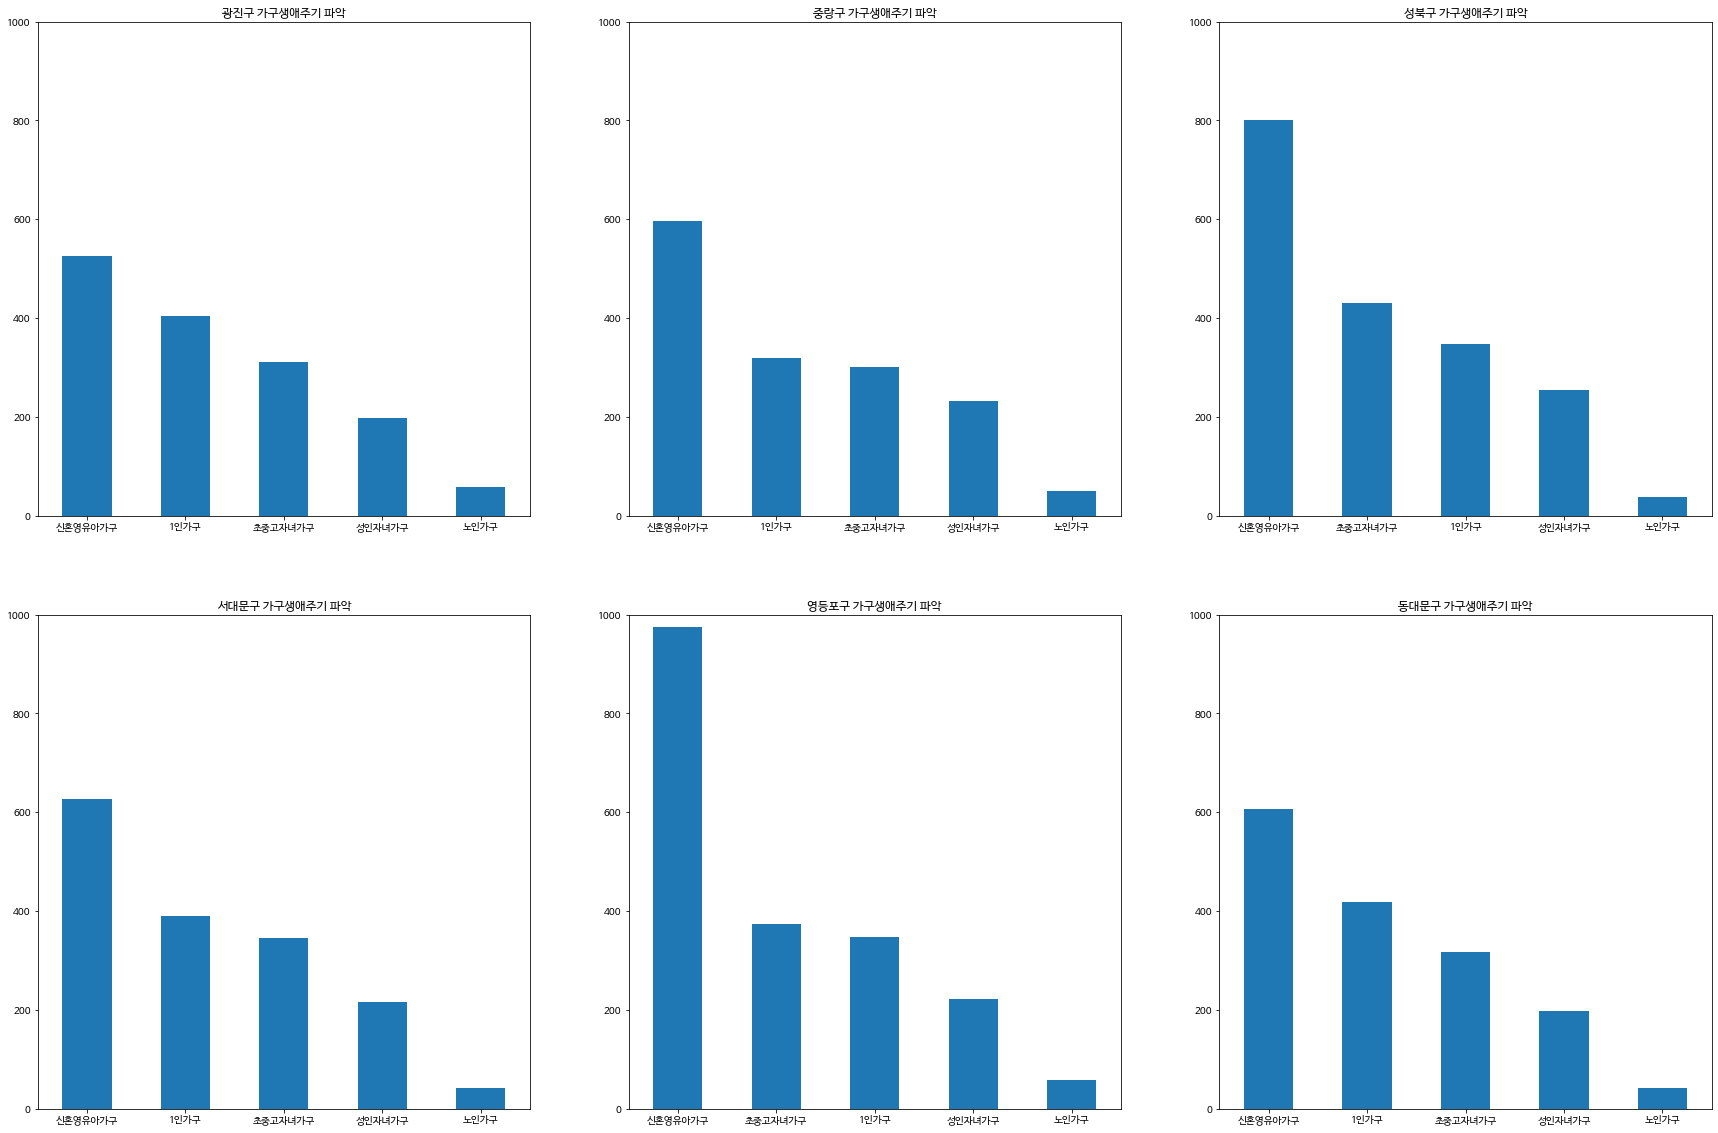

In [212]:
plt.figure(figsize = (30,20))

for j in range(len(cluster0_list)):
    plt.subplot(2,3,j+1)
    cluster0[j]['가구생애주기'].value_counts().plot.bar()
    plt.ylim([0, 1000])
    plt.xticks(rotation=0)
    plt.title(cluster0_list[j]+ ' 가구생애주기 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

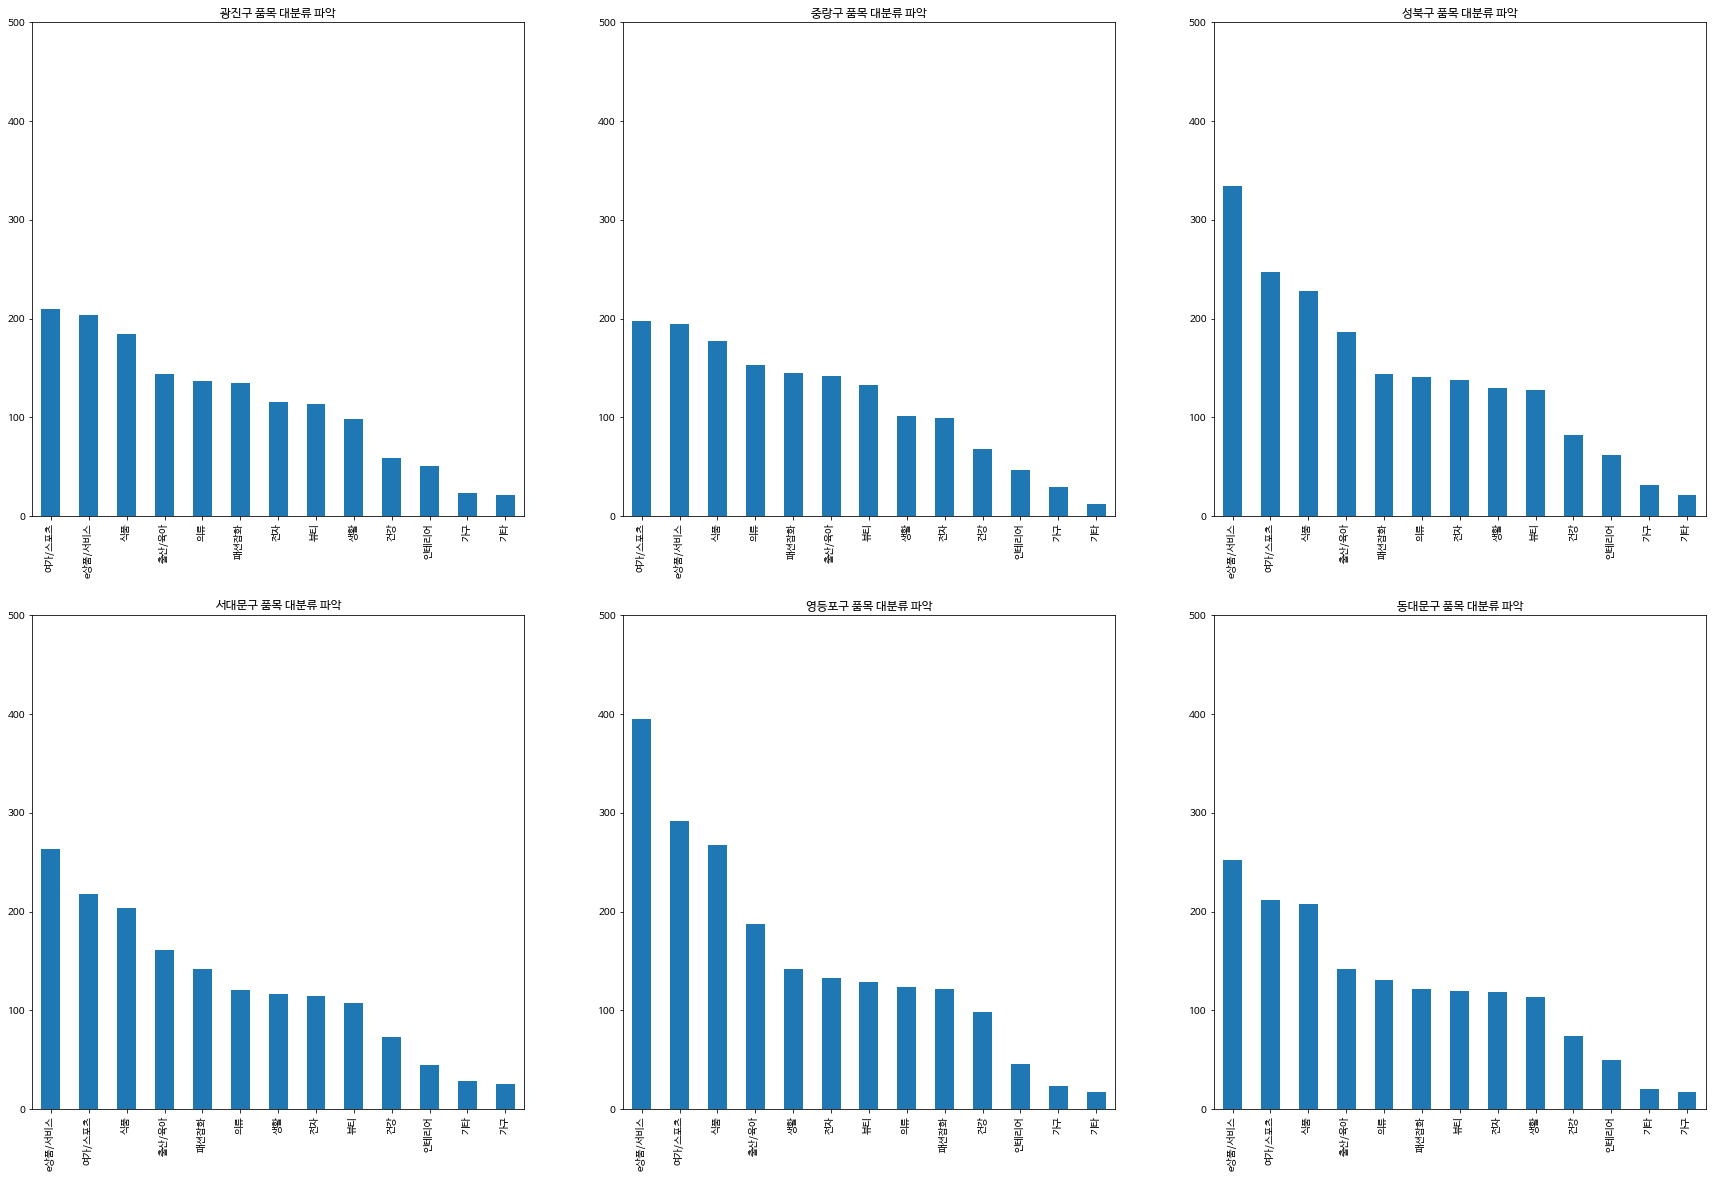

In [213]:
plt.figure(figsize = (30,20))

for j in range(len(cluster0_list)):
    plt.subplot(2,3,j+1)
    cluster0[j]['품목대분류명'].value_counts().plot.bar()
    plt.ylim([0, 500])
    plt.title(cluster0_list[j]+ ' 품목 대분류 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

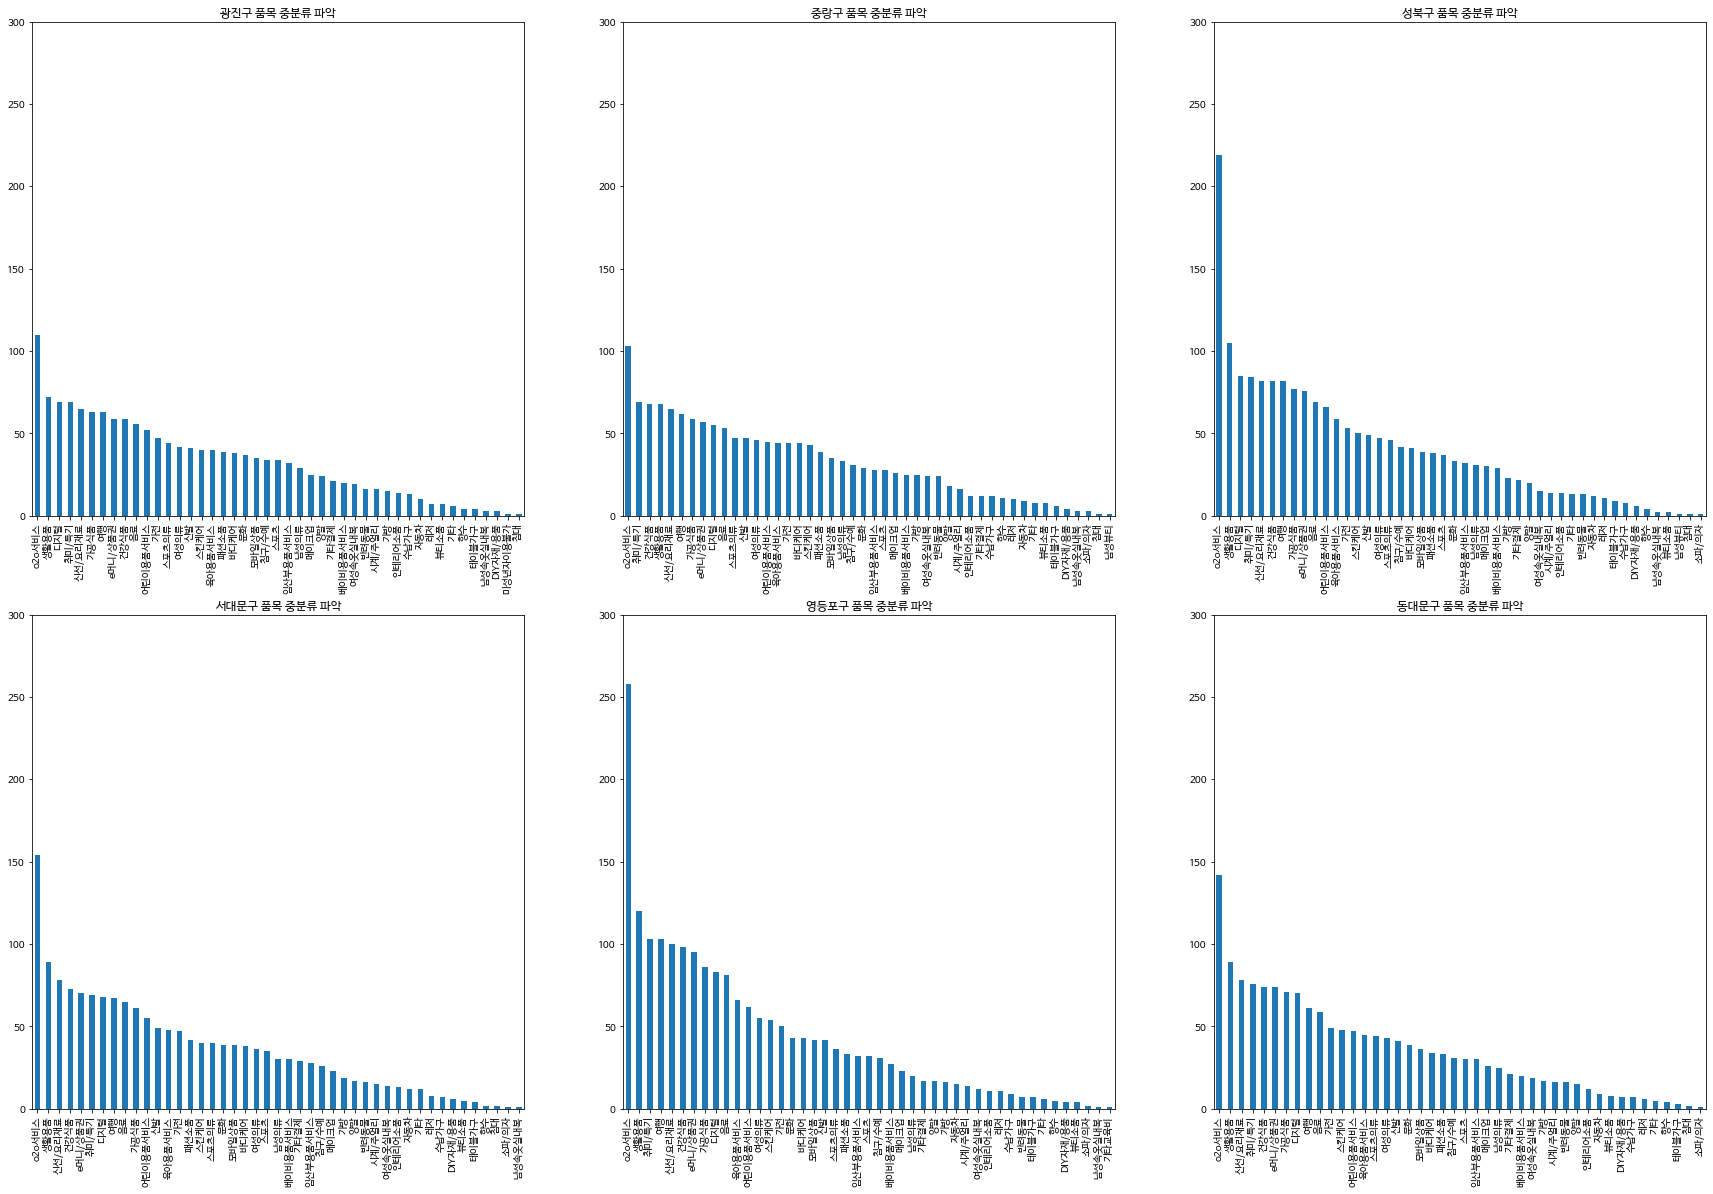

In [281]:
plt.figure(figsize = (30,20))

for j in range(len(cluster0_list)):
    plt.subplot(2,3,j+1)
    cluster0[j]['품목중분류명'].value_counts().plot.bar()
    plt.ylim([0, 300])
    plt.title(cluster0_list[j]+ ' 품목 중분류 파악')

plt.plot

In [214]:
# cluster == 1
df_1903_cluster1 = df_1903[df_1903['large_moneycount_cluster'] == 1]
cluster1_list = []
cluster1_list = df_1903_cluster1['고객소재지_시군구'].unique()

print(cluster1_list)

iscluster1 = []
for i in range(len(cluster1_list)):
    iscluster1.append(df_1903_cluster1['고객소재지_시군구'] == cluster1_list[i])
    
cluster1 = []
for i in range(len(cluster1_list)):
    cluster1.append(df_1903_cluster1[iscluster1[i]])

['송파구' '강서구' '강남구' '관악구']


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

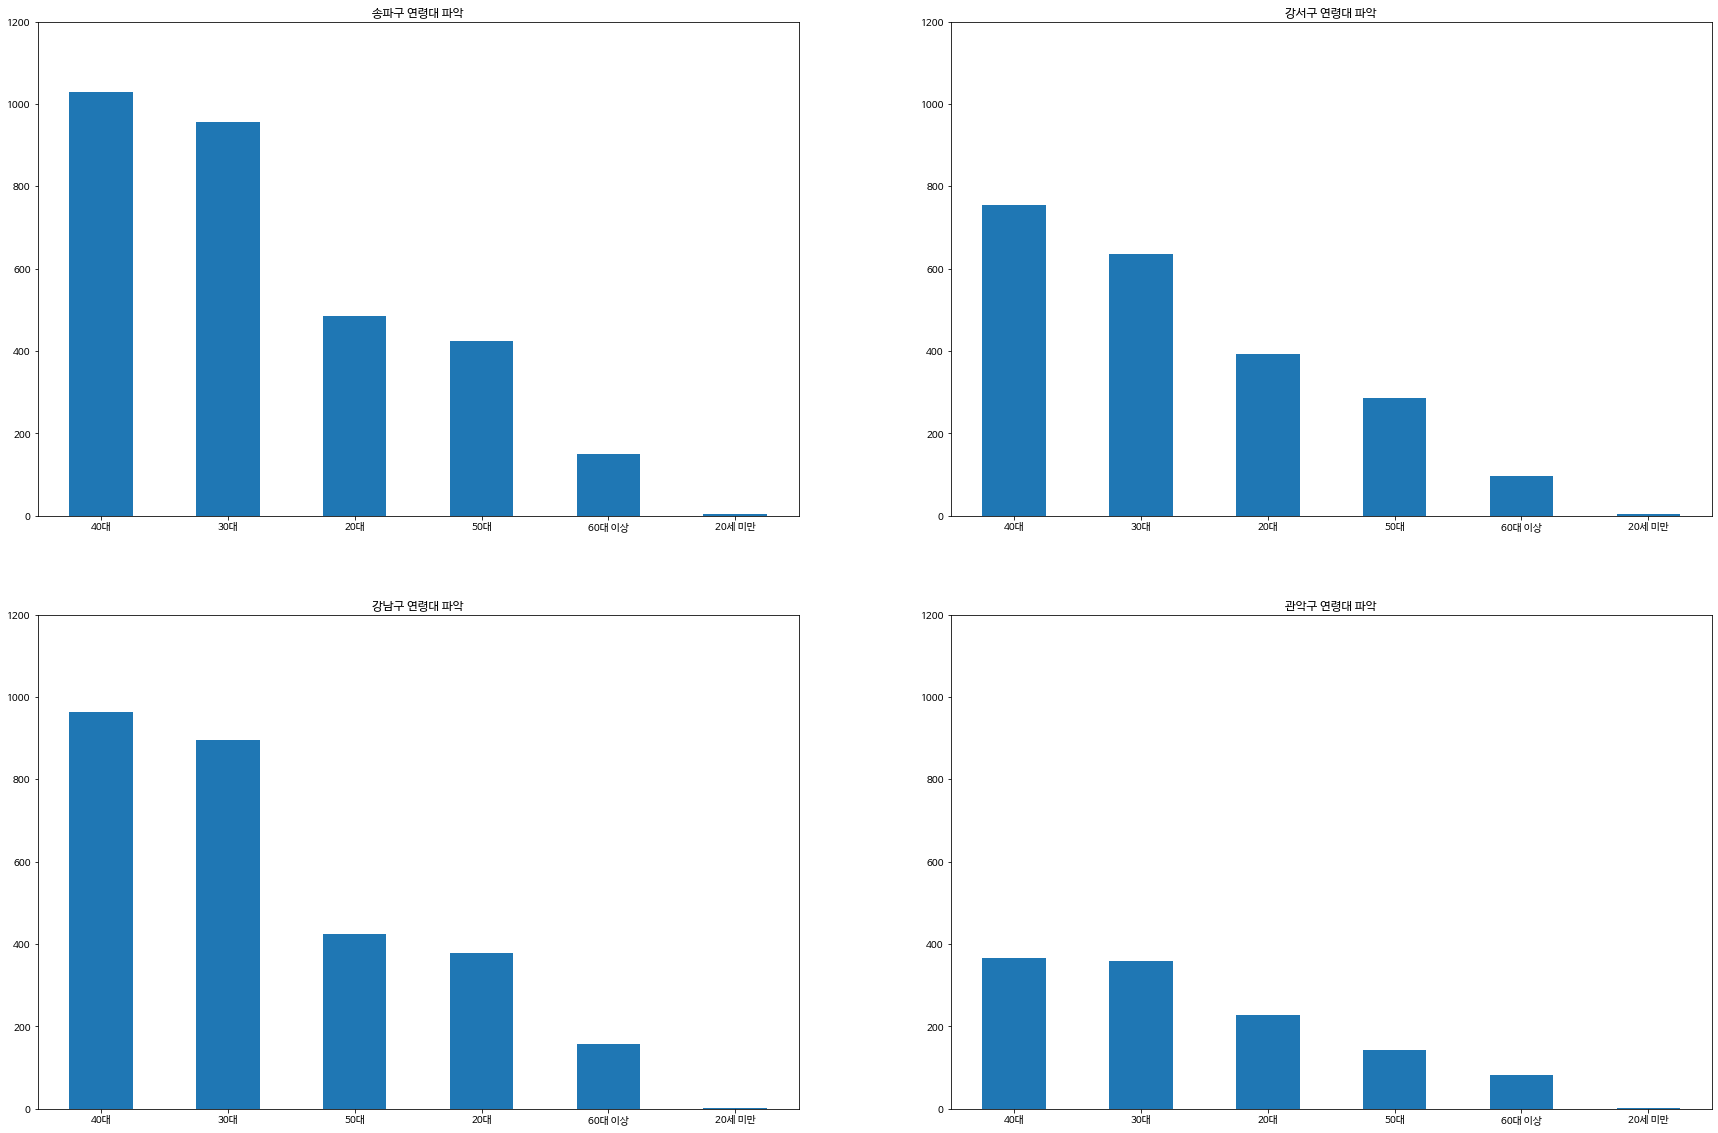

In [235]:
plt.figure(figsize = (30,20))

for j in range(len(cluster1_list)):
    plt.subplot(2,2,j+1)
    cluster1[j]['연령'].value_counts().plot.bar()
    plt.ylim([0, 1200])
    plt.xticks(rotation=0)
    plt.title(cluster1_list[j]+ ' 연령대 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

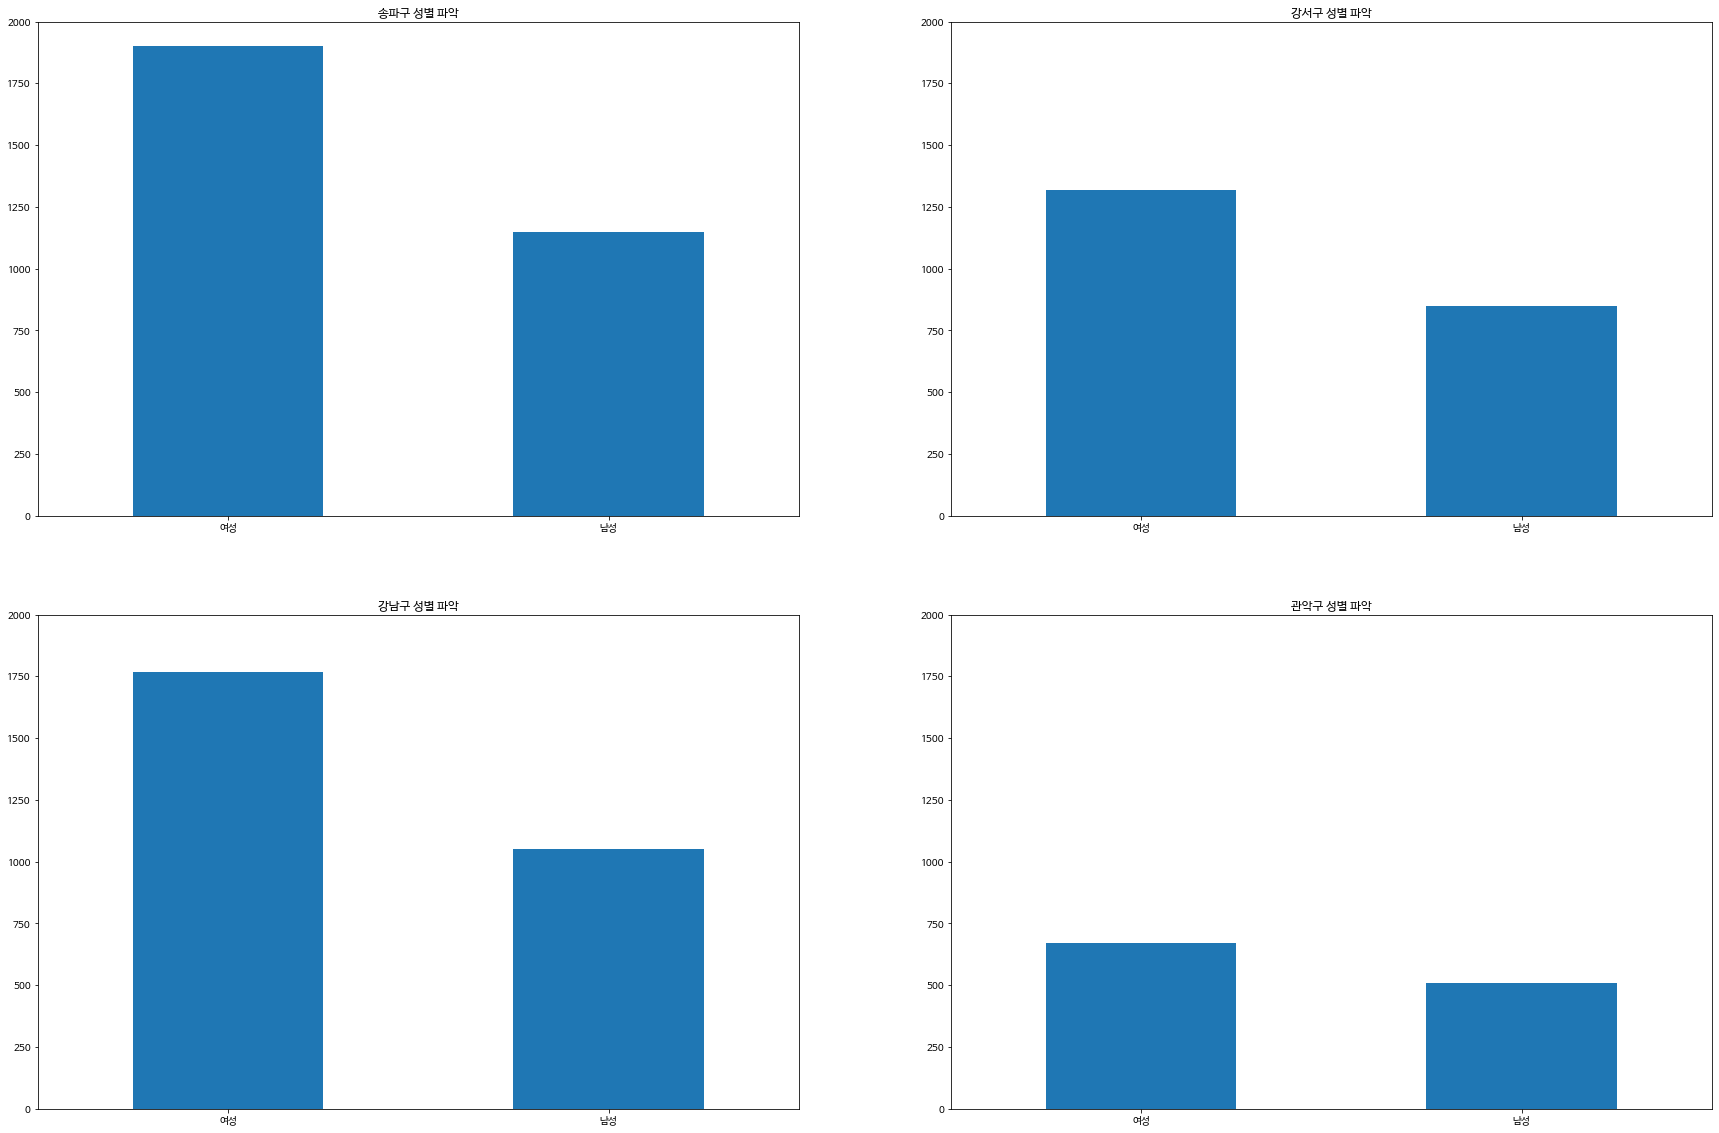

In [238]:
plt.figure(figsize = (30,20))

for j in range(len(cluster1_list)):
    plt.subplot(2,2,j+1)
    cluster1[j]['성별'].value_counts().plot.bar()
    plt.ylim([0, 2000])
    plt.xticks(rotation=0)
    plt.title(cluster1_list[j]+ ' 성별 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

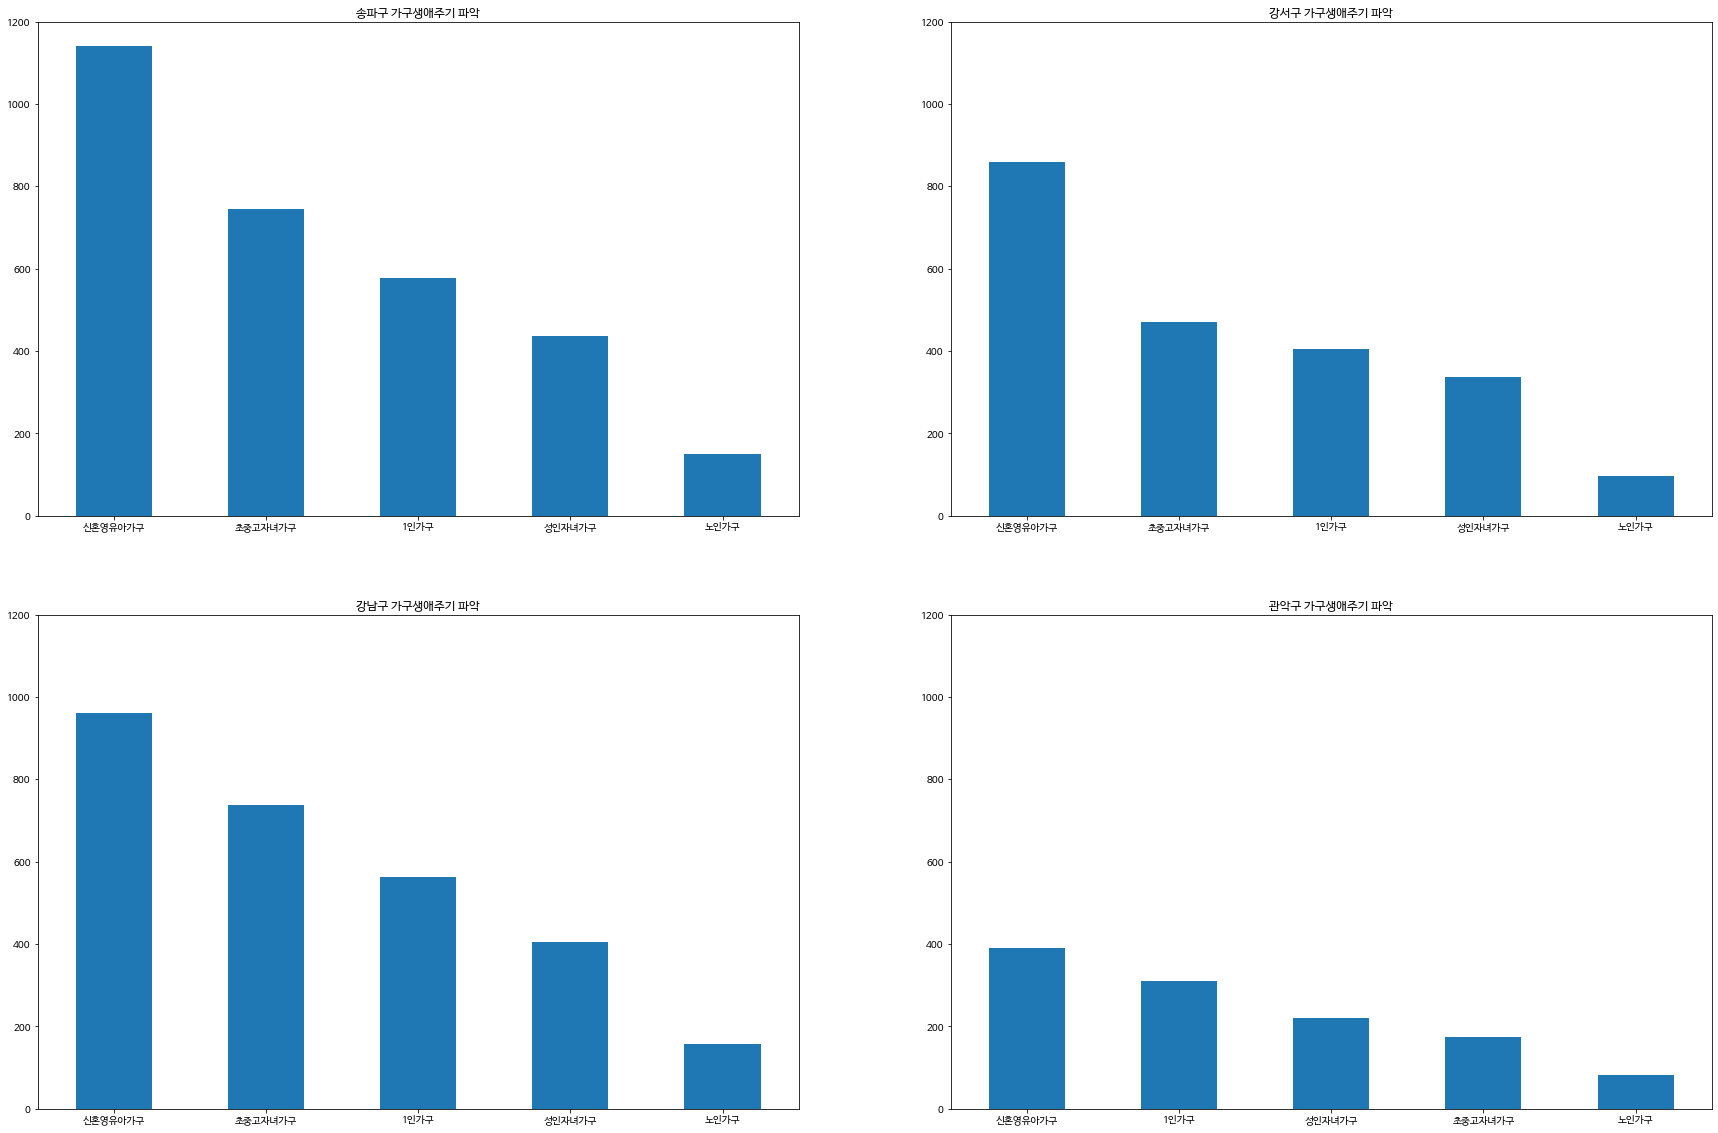

In [279]:
plt.figure(figsize = (30,20))

for j in range(len(cluster1_list)):
    plt.subplot(2,2,j+1)
    cluster1[j]['가구생애주기'].value_counts().plot.bar()
    plt.ylim([0, 1200])
    plt.xticks(rotation=0)
    plt.title(cluster1_list[j]+ ' 가구생애주기 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

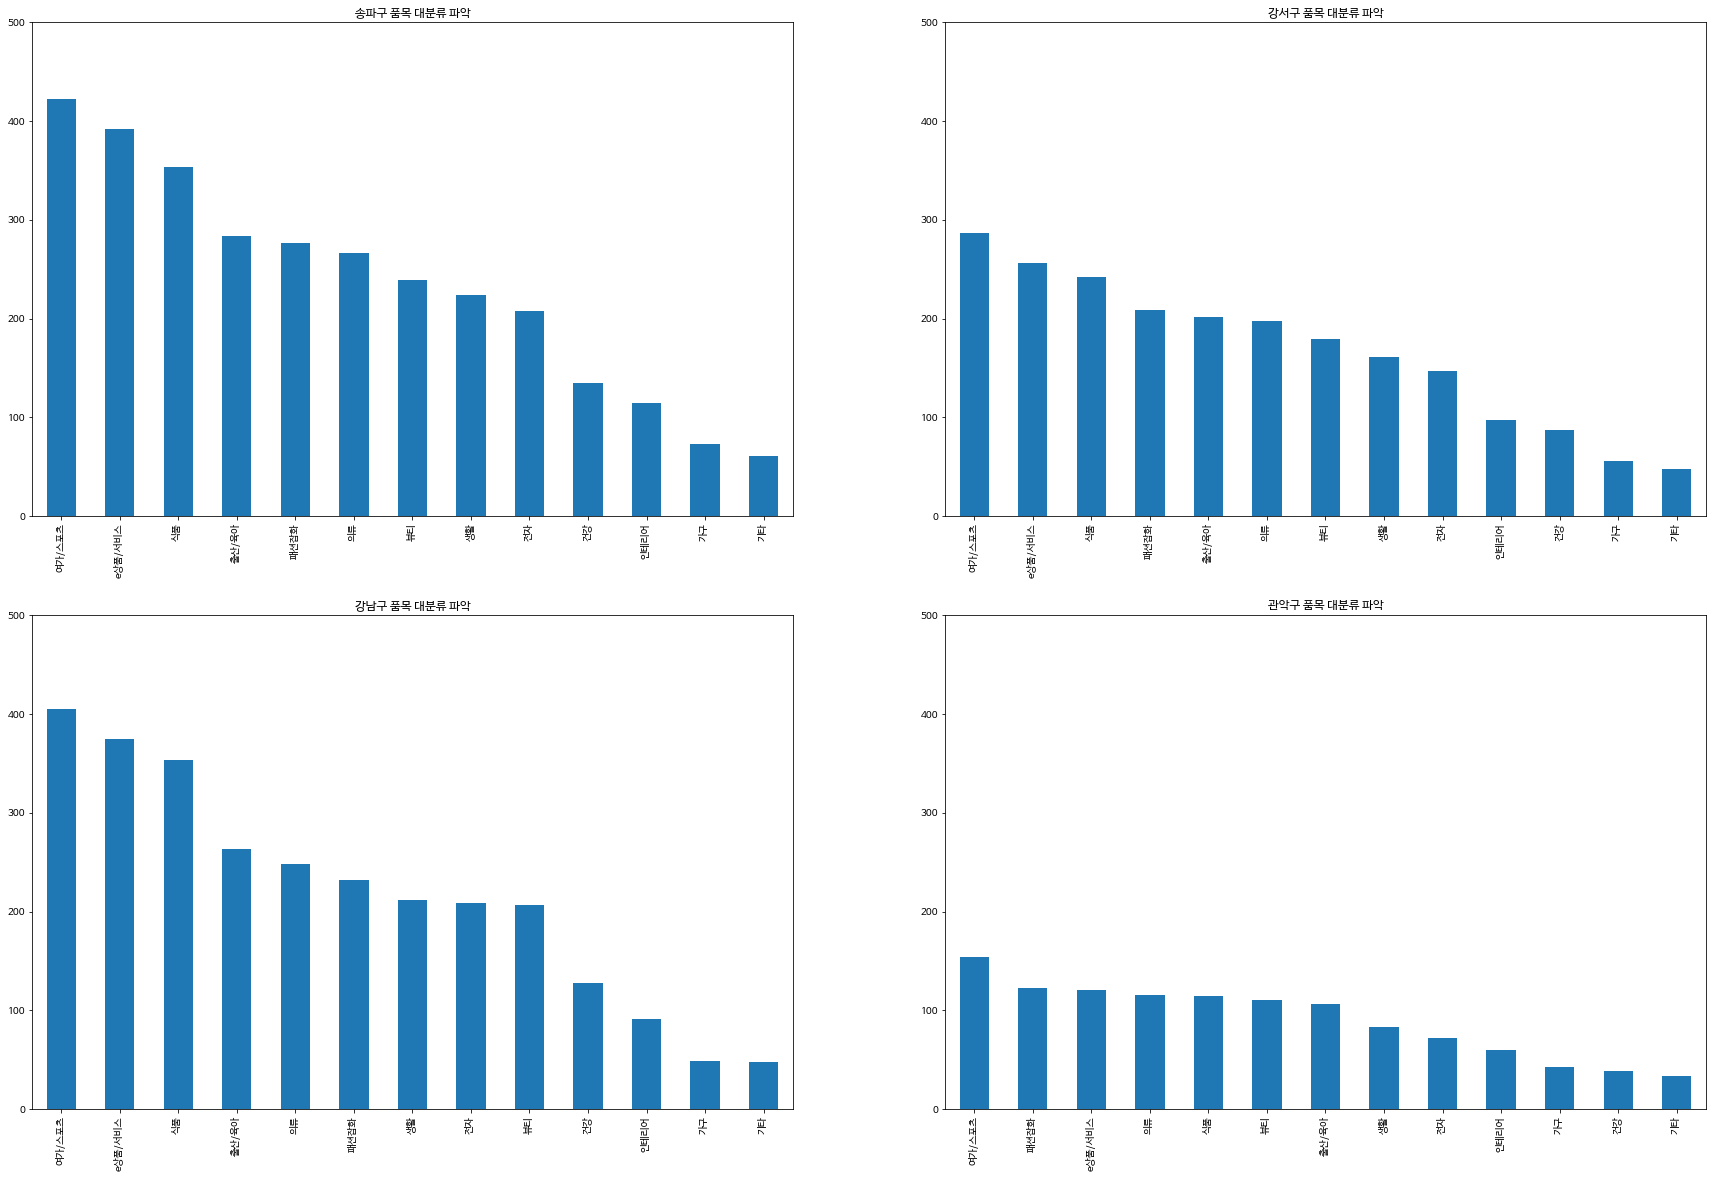

In [218]:
plt.figure(figsize = (30,20))

for j in range(len(cluster1_list)):
    plt.subplot(2,2,j+1)
    cluster1[j]['품목대분류명'].value_counts().plot.bar()
    plt.ylim([0, 500])
    plt.title(cluster1_list[j]+ ' 품목 대분류 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

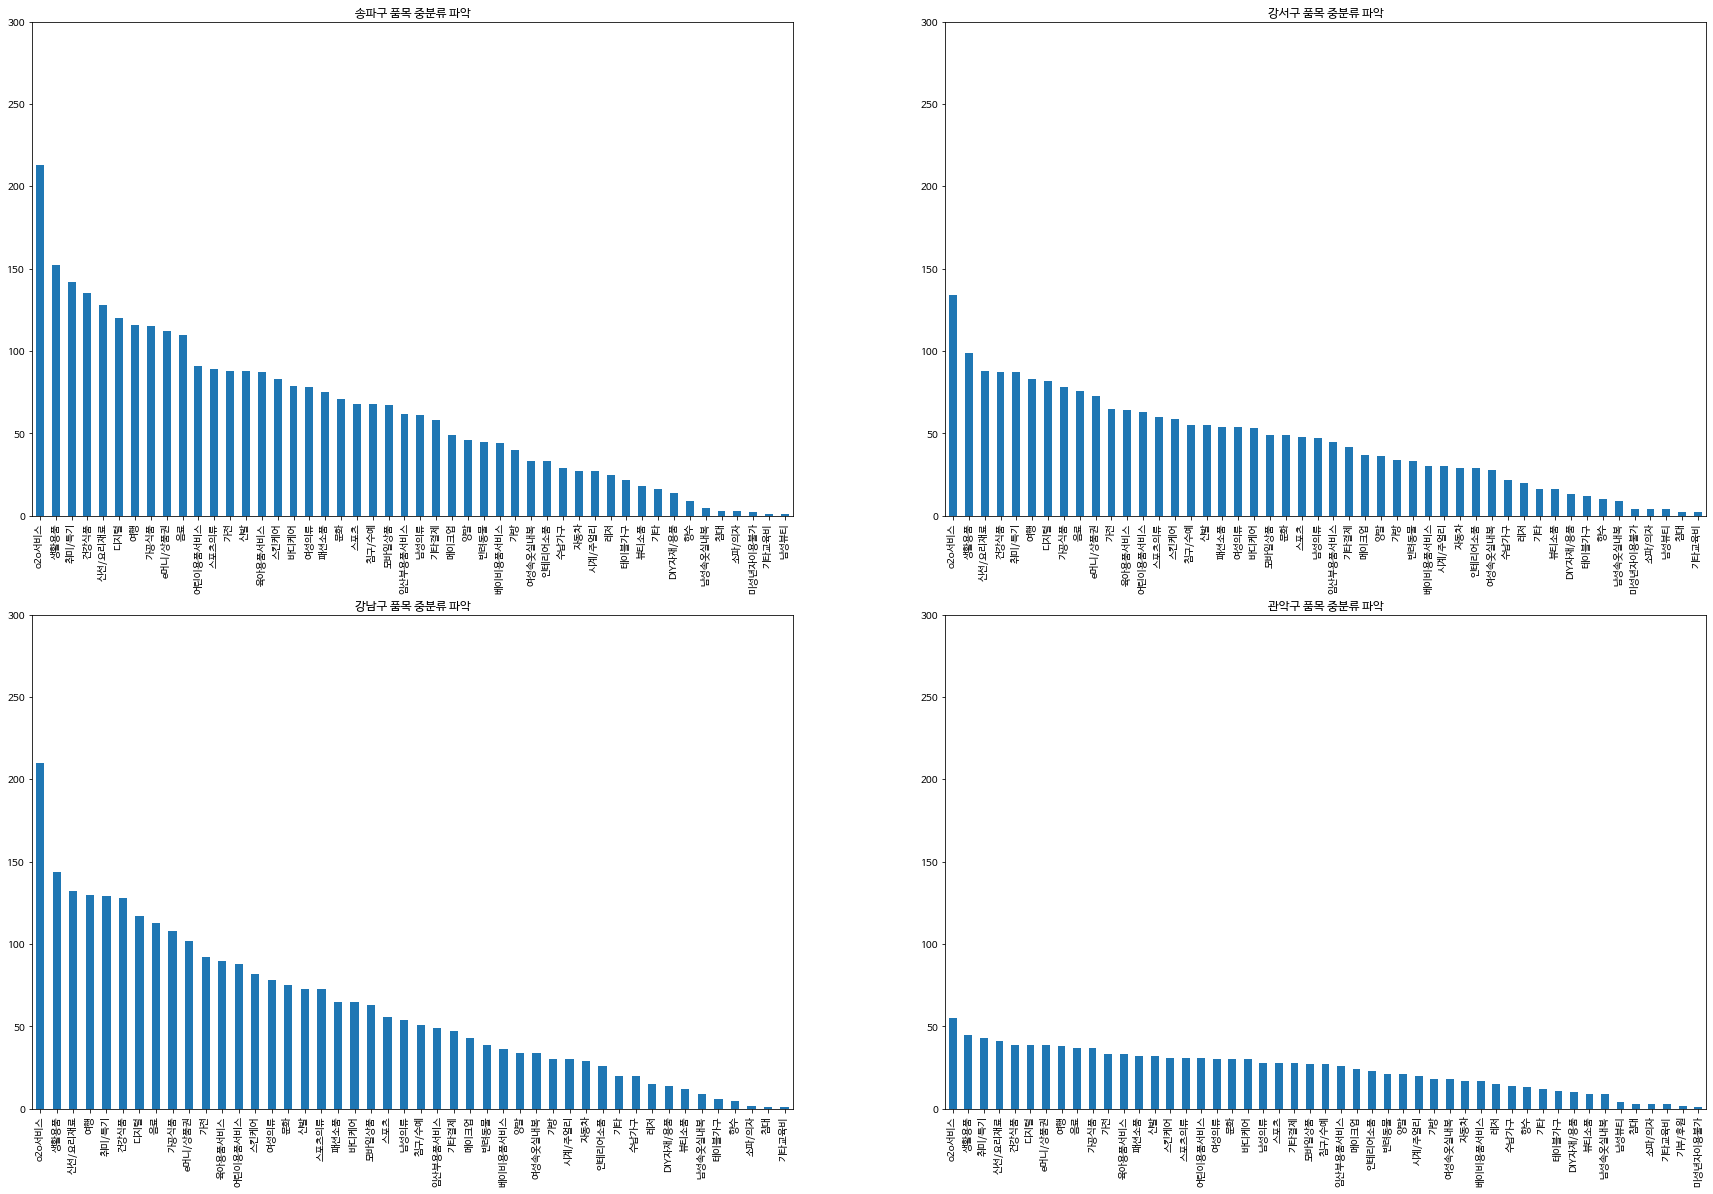

In [277]:
plt.figure(figsize = (30,20))

for j in range(len(cluster1_list)):
    plt.subplot(2,2,j+1)
    cluster1[j]['품목중분류명'].value_counts().plot.bar()
    plt.ylim([0, 300])
    plt.title(cluster1_list[j]+ ' 품목 중분류 파악')

plt.plot

In [219]:
# cluster == 2
df_1903_cluster2 = df_1903[df_1903['large_moneycount_cluster'] == 2]
cluster2_list = []
cluster2_list = df_1903_cluster2['고객소재지_시군구'].unique()

print(cluster2_list)

iscluster2 = []
for i in range(len(cluster2_list)):
    iscluster2.append(df_1903_cluster2['고객소재지_시군구'] == cluster2_list[i])
    
cluster2 = []
for i in range(len(cluster2_list)):
    cluster2.append(df_1903_cluster2[iscluster2[i]])

['용산구' '종로구' '중구']


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

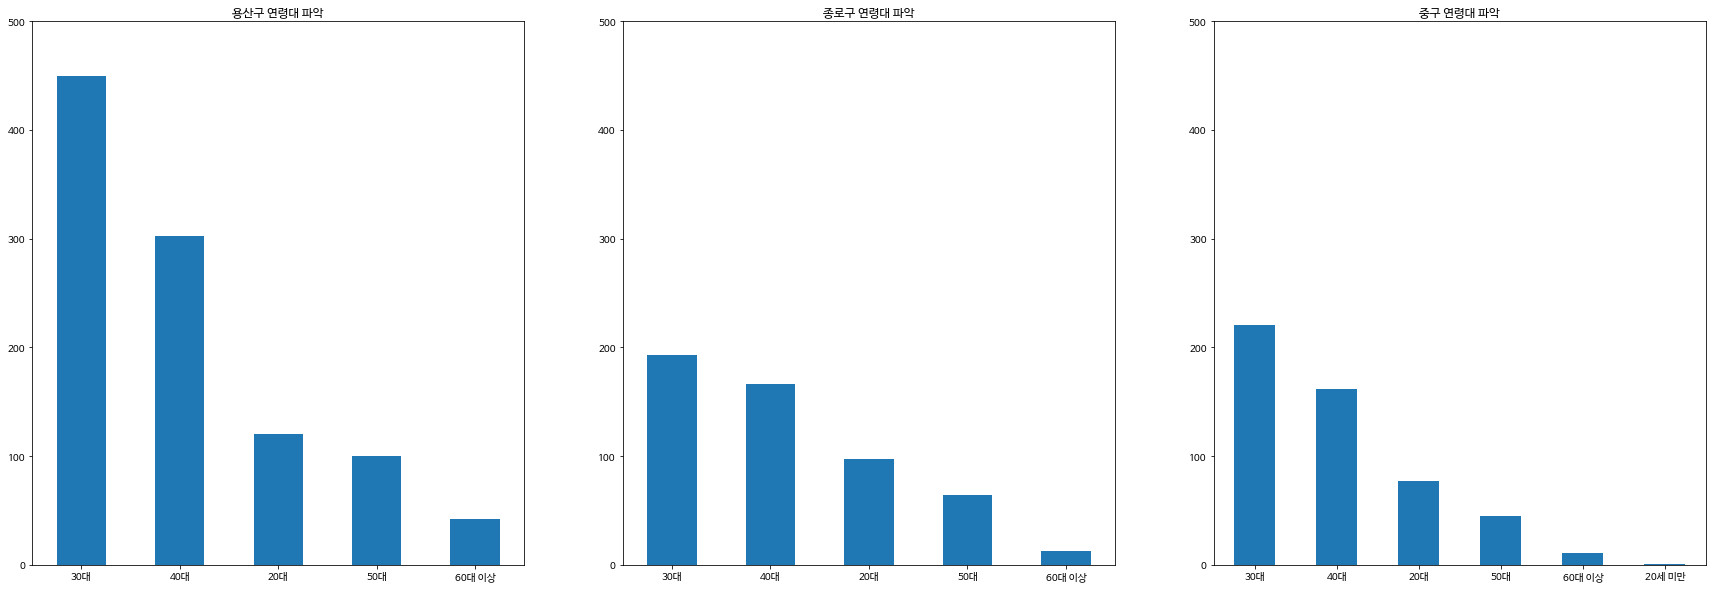

In [276]:
plt.figure(figsize = (30,10))

for j in range(len(cluster2_list)):
    plt.subplot(1,3,j+1)
    cluster2[j]['연령'].value_counts().plot.bar()
    plt.ylim([0, 500])
    plt.xticks(rotation=0)
    plt.title(cluster2_list[j]+ ' 연령대 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

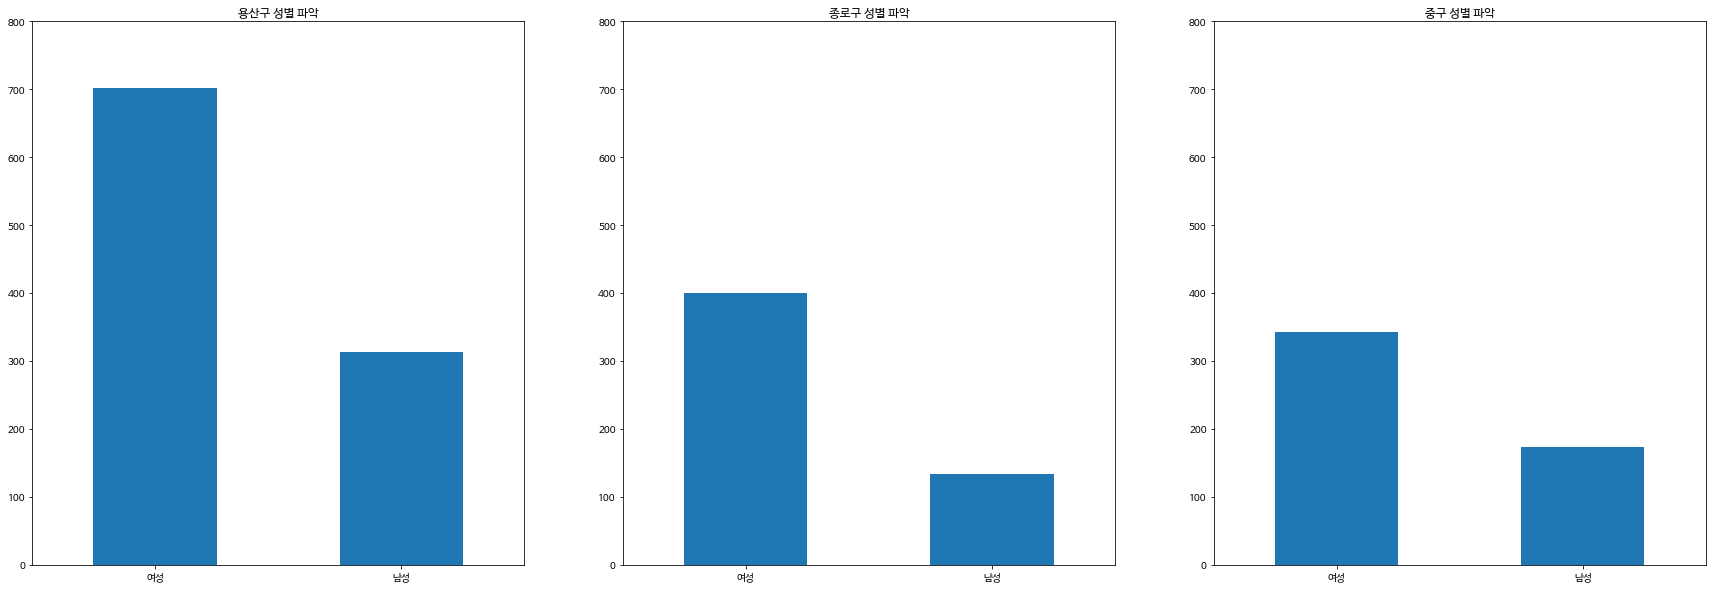

In [275]:
plt.figure(figsize = (30,10))

for j in range(len(cluster2_list)):
    plt.subplot(1,3,j+1)
    cluster2[j]['성별'].value_counts().plot.bar()
    plt.ylim([0, 800])
    plt.xticks(rotation=0)
    plt.title(cluster2_list[j]+ ' 성별 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

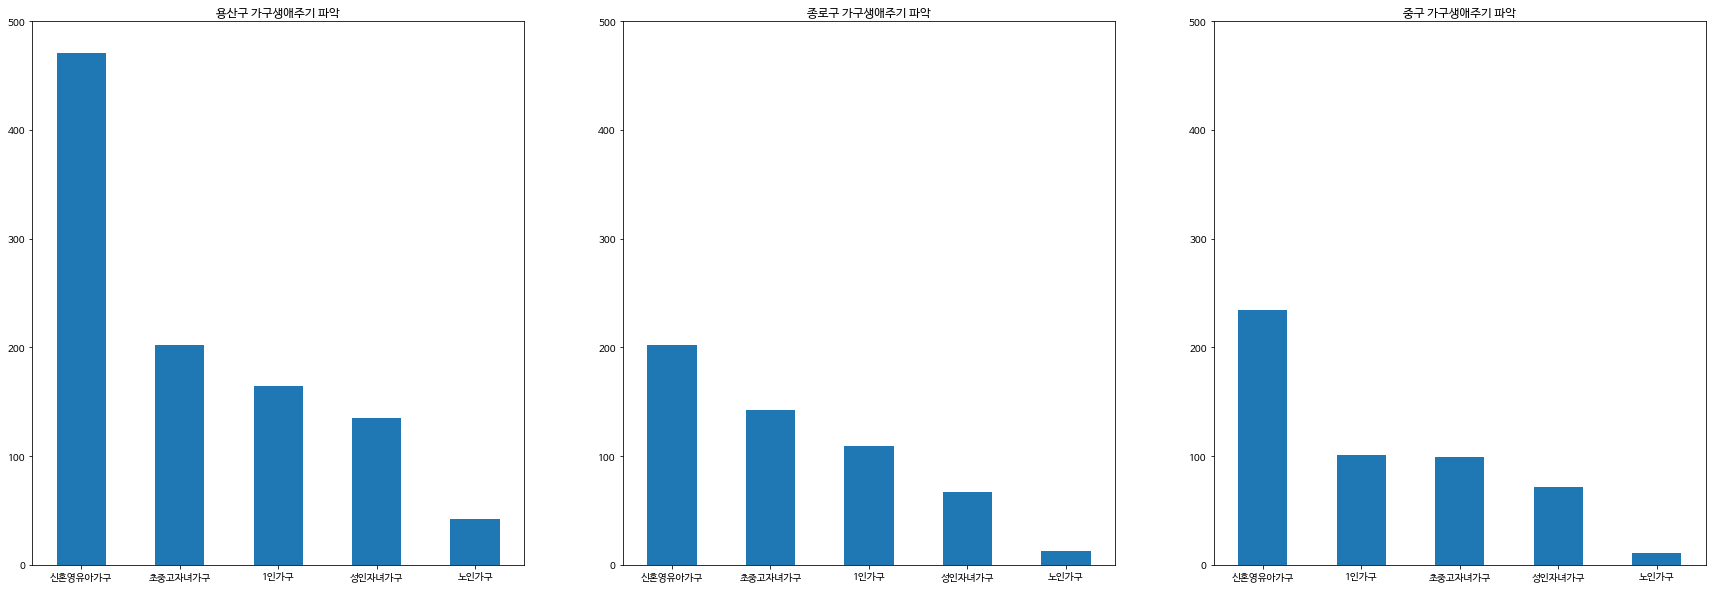

In [274]:
plt.figure(figsize = (30,10))

for j in range(len(cluster2_list)):
    plt.subplot(1,3,j+1)
    cluster2[j]['가구생애주기'].value_counts().plot.bar()
    plt.ylim([0, 500])
    plt.xticks(rotation=0)
    plt.title(cluster2_list[j]+ ' 가구생애주기 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

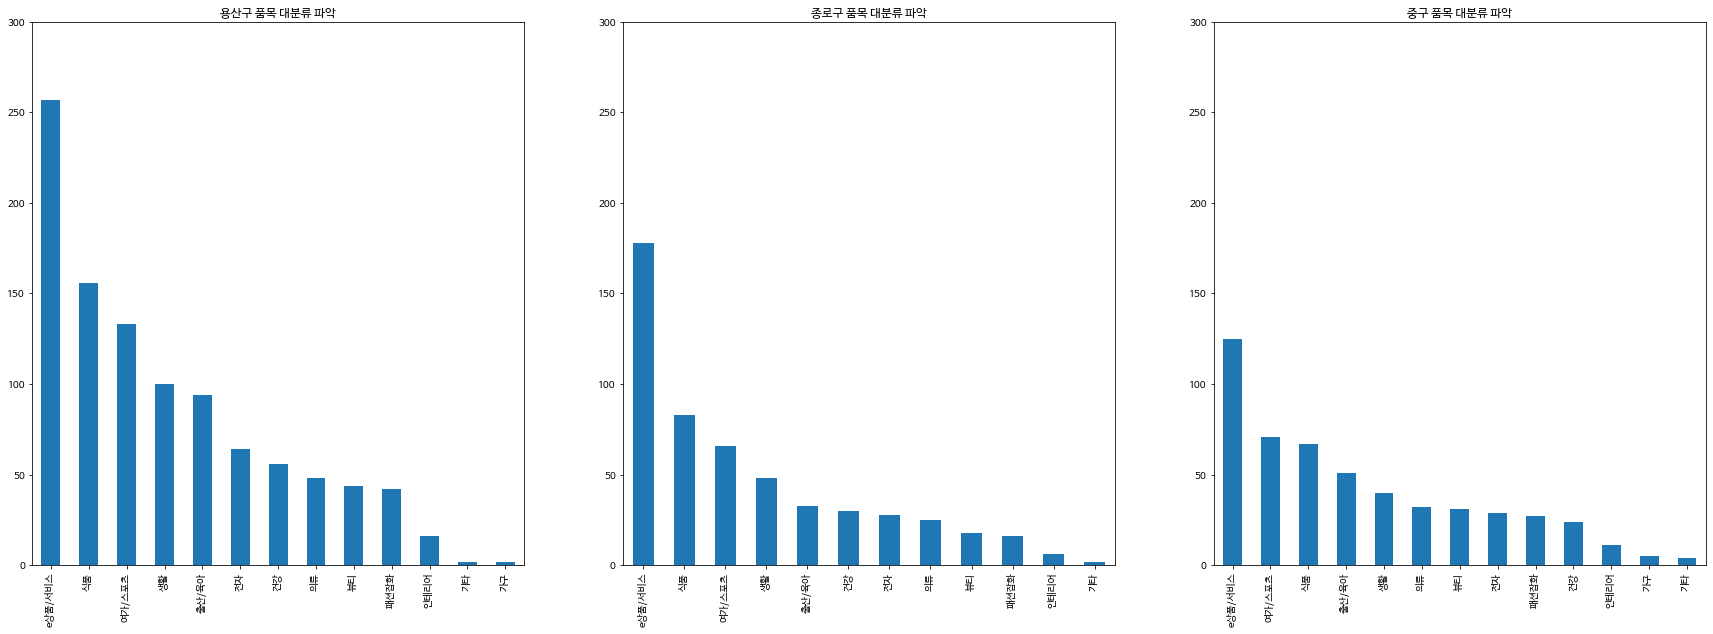

In [246]:
plt.figure(figsize = (30,10))

for j in range(len(cluster2_list)):
    plt.subplot(1,3,j+1)
    cluster2[j]['품목대분류명'].value_counts().plot.bar()
    plt.ylim([0, 300])
    plt.title(cluster2_list[j]+ ' 품목 대분류 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

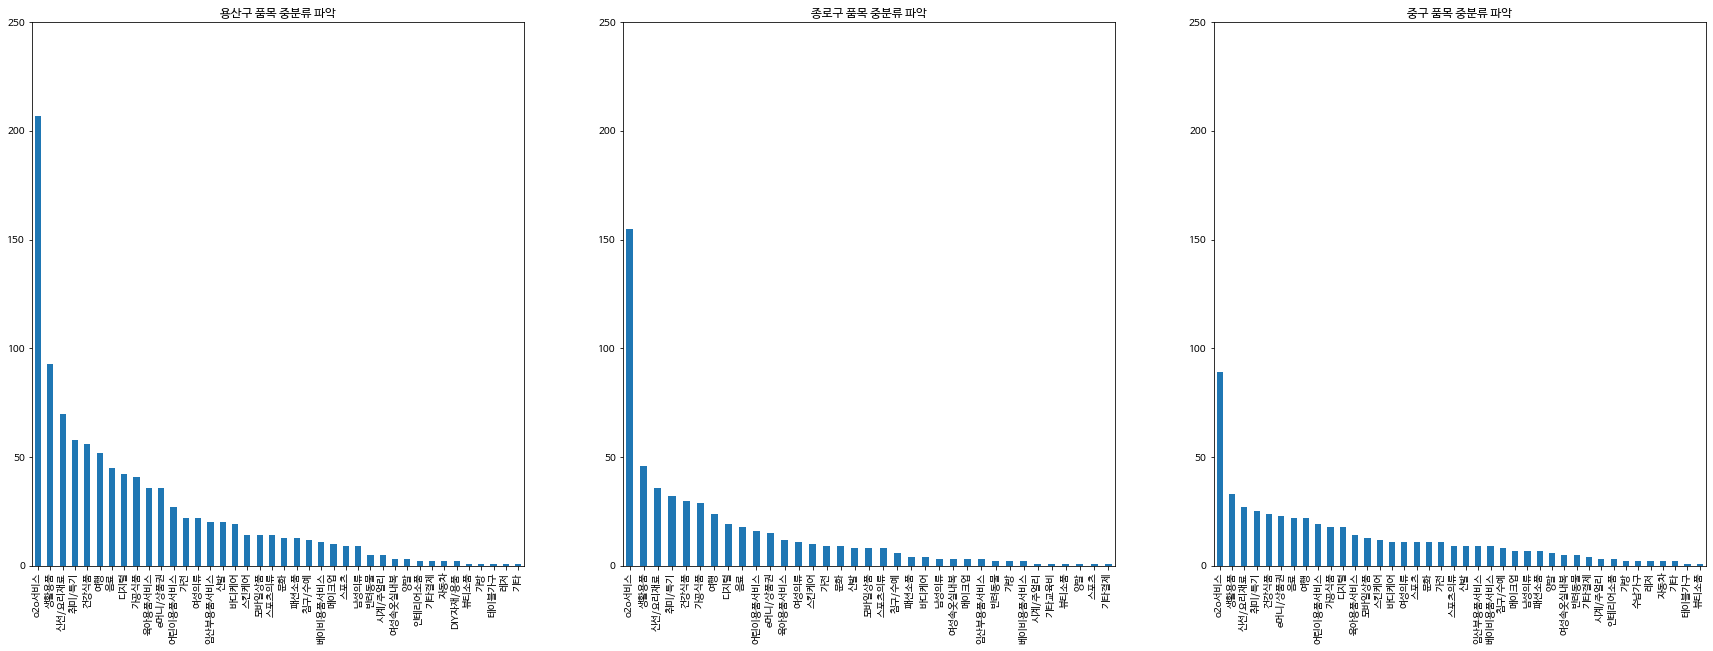

In [272]:
plt.figure(figsize = (30,10))

for j in range(len(cluster2_list)):
    plt.subplot(1,3,j+1)
    cluster2[j]['품목중분류명'].value_counts().plot.bar()
    plt.ylim([0, 250])
    plt.title(cluster2_list[j]+ ' 품목 중분류 파악')

plt.plot

In [224]:
# cluster == 3
df_1903_cluster3 = df_1903[df_1903['large_moneycount_cluster'] == 3]
cluster3_list = []
cluster3_list = df_1903_cluster3['고객소재지_시군구'].unique()

print(cluster3_list)

iscluster3 = []
for i in range(len(cluster3_list)):
    iscluster3.append(df_1903_cluster3['고객소재지_시군구'] == cluster3_list[i])
    
cluster3 = []
for i in range(len(cluster3_list)):
    cluster3.append(df_1903_cluster3[iscluster3[i]])

['구로구' '강동구' '양천구' '동작구' '마포구' '은평구' '노원구' '서초구']


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

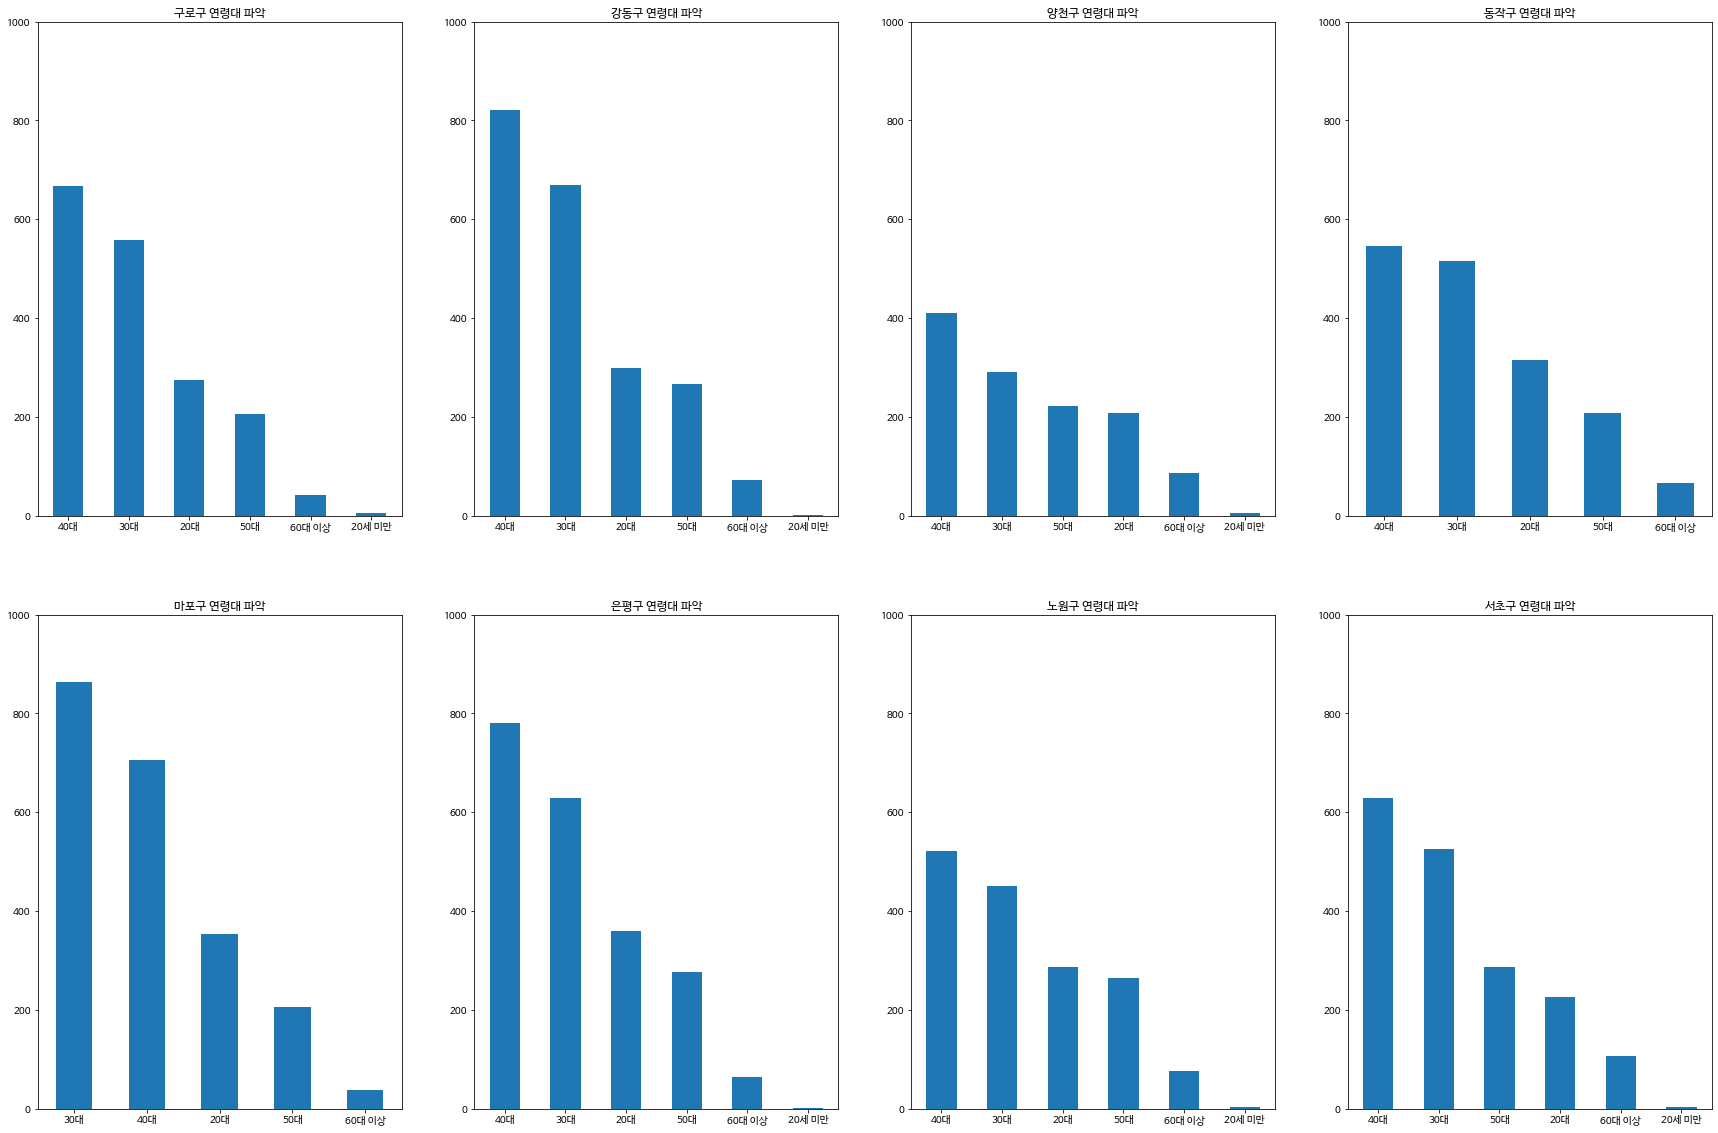

In [225]:
plt.figure(figsize = (30,20))

for j in range(len(cluster3_list)):
    plt.subplot(2,4,j+1)
    cluster3[j]['연령'].value_counts().plot.bar()
    plt.ylim([0, 1000])
    plt.xticks(rotation=0)
    plt.title(cluster3_list[j]+ ' 연령대 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

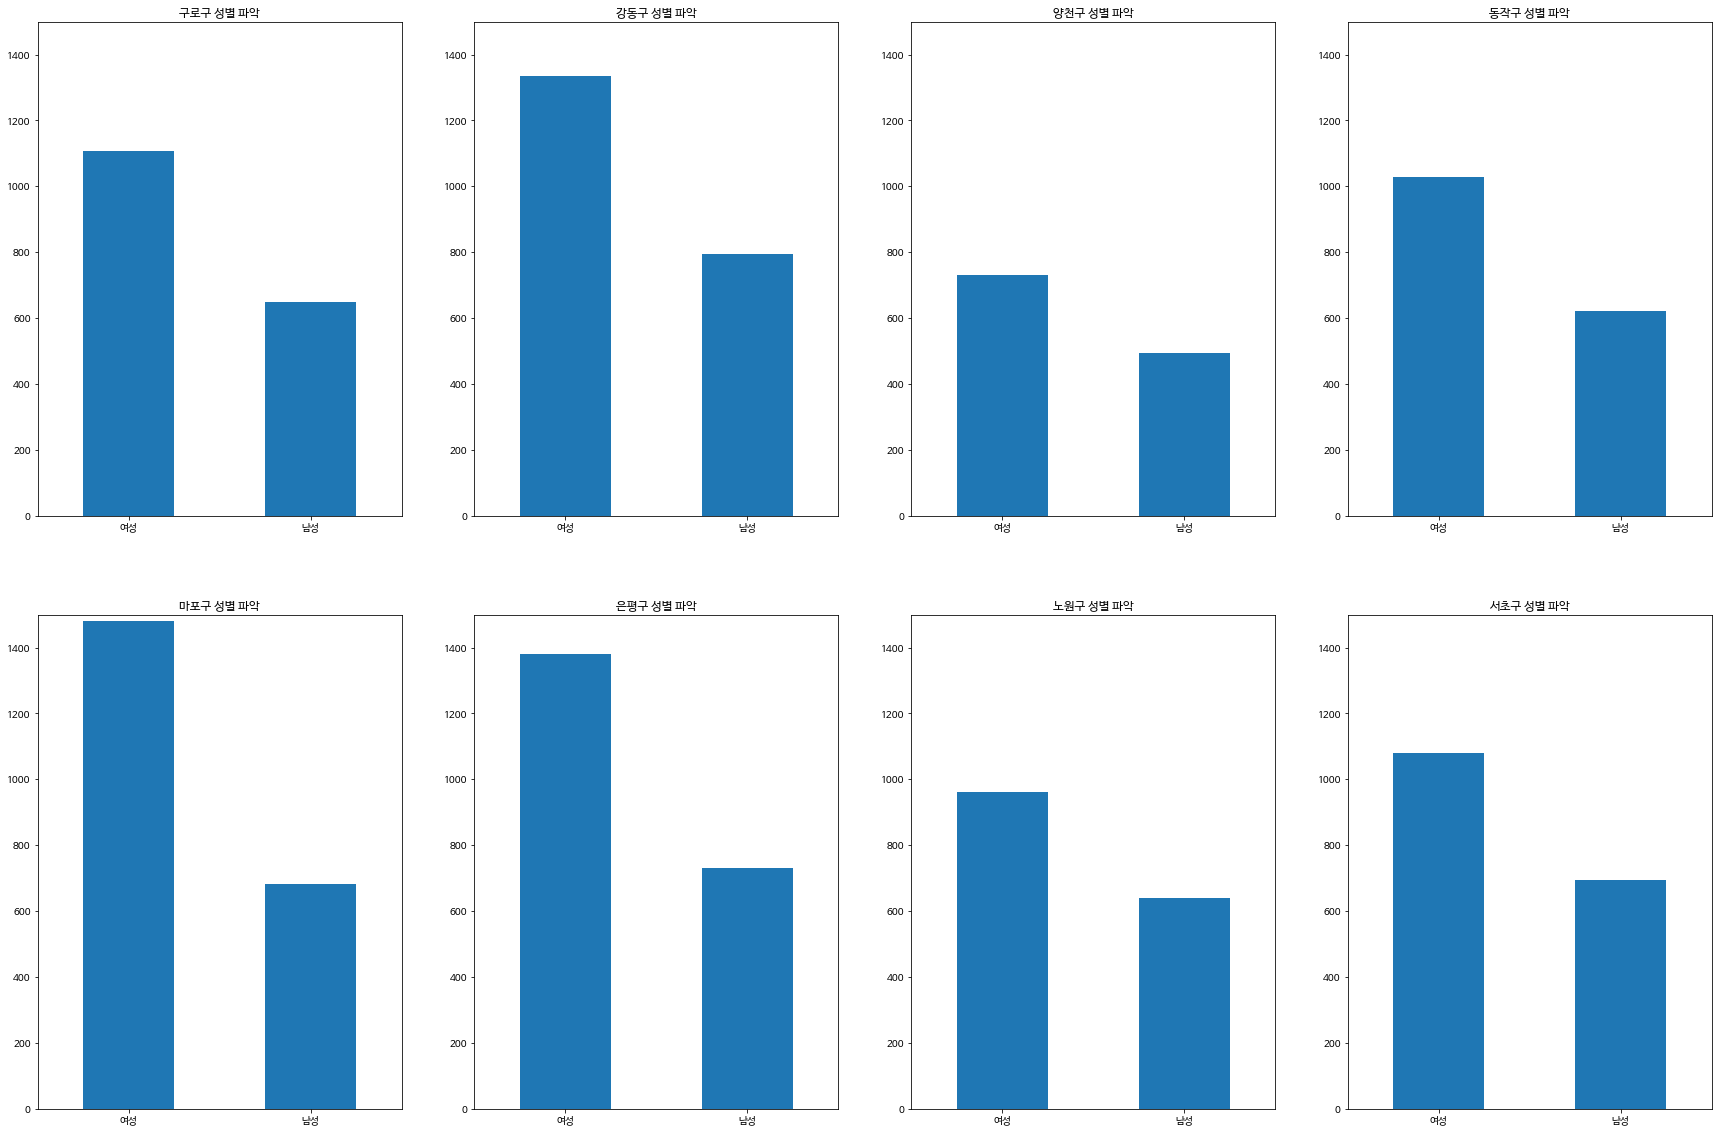

In [226]:
plt.figure(figsize = (30,20))

for j in range(len(cluster3_list)):
    plt.subplot(2,4,j+1)
    cluster3[j]['성별'].value_counts().plot.bar()
    plt.ylim([0, 1500])
    plt.xticks(rotation=0)
    plt.title(cluster3_list[j]+ ' 성별 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

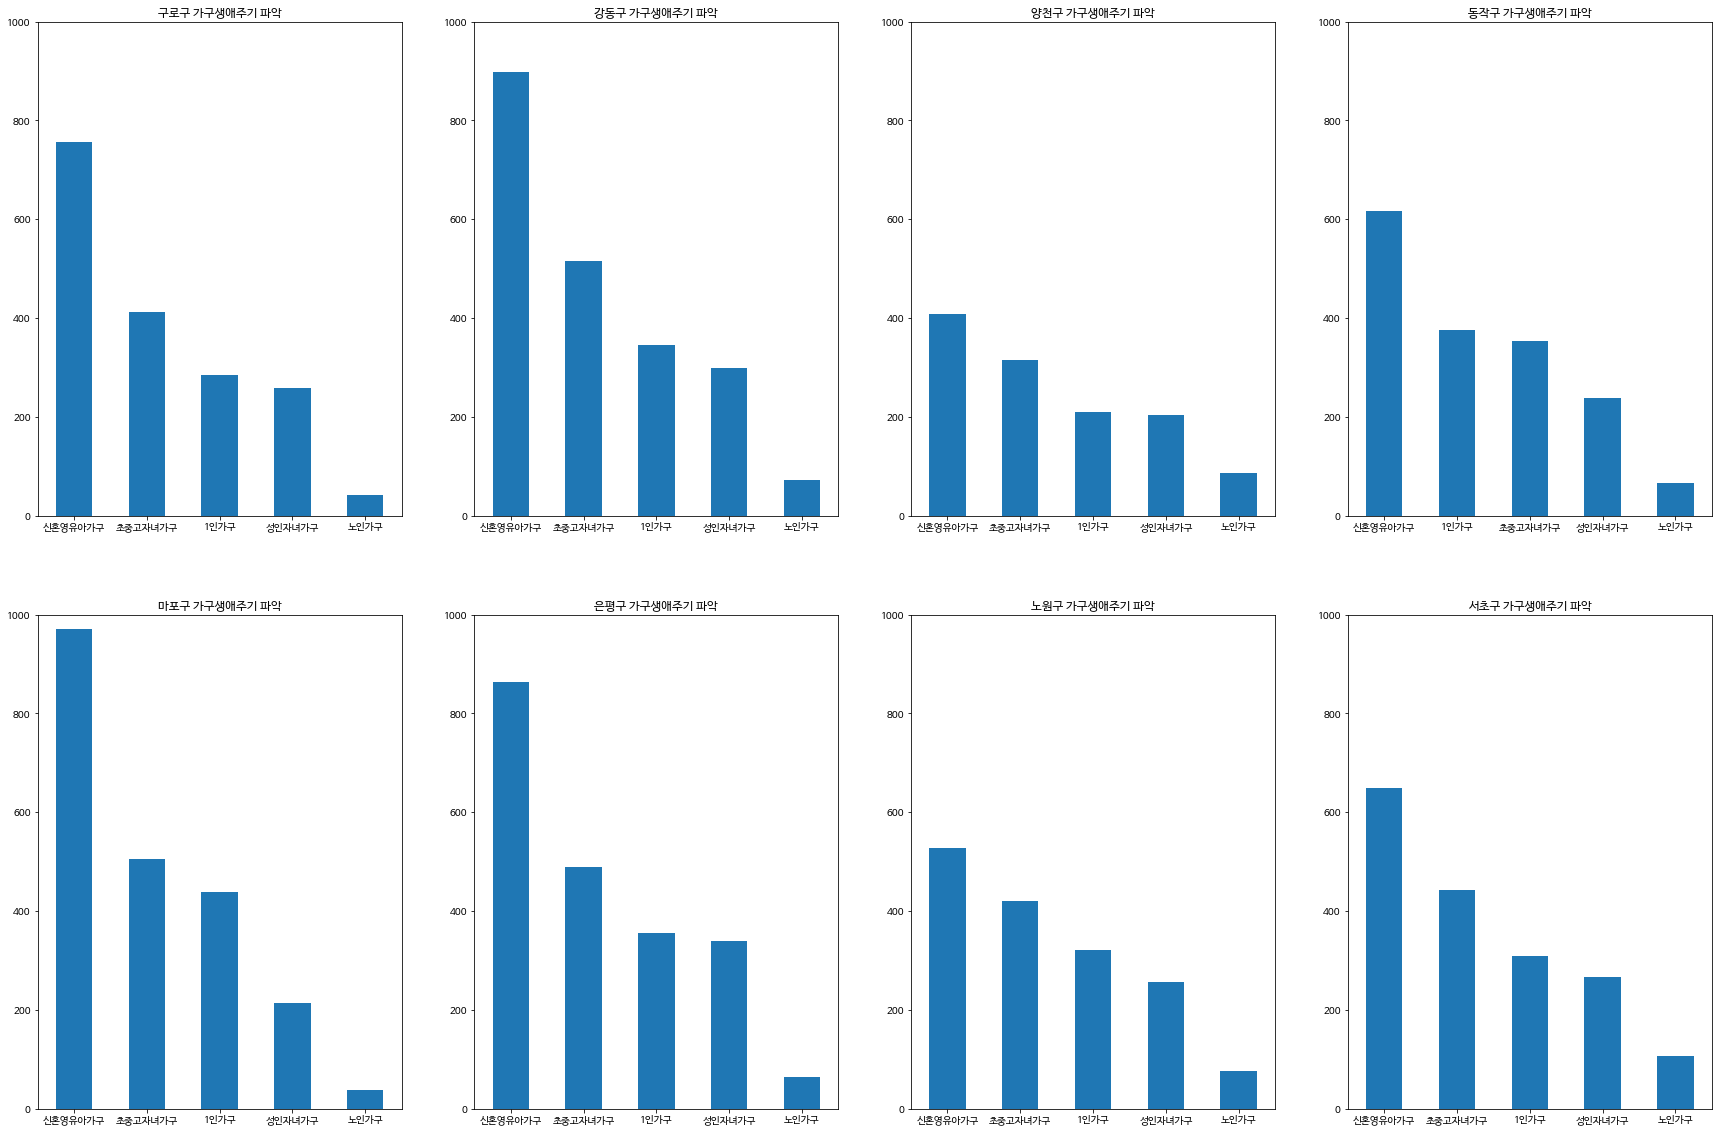

In [227]:
plt.figure(figsize = (30,20))

for j in range(len(cluster3_list)):
    plt.subplot(2,4,j+1)
    cluster3[j]['가구생애주기'].value_counts().plot.bar()
    plt.ylim([0, 1000])
    plt.xticks(rotation=0)
    plt.title(cluster3_list[j]+ ' 가구생애주기 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

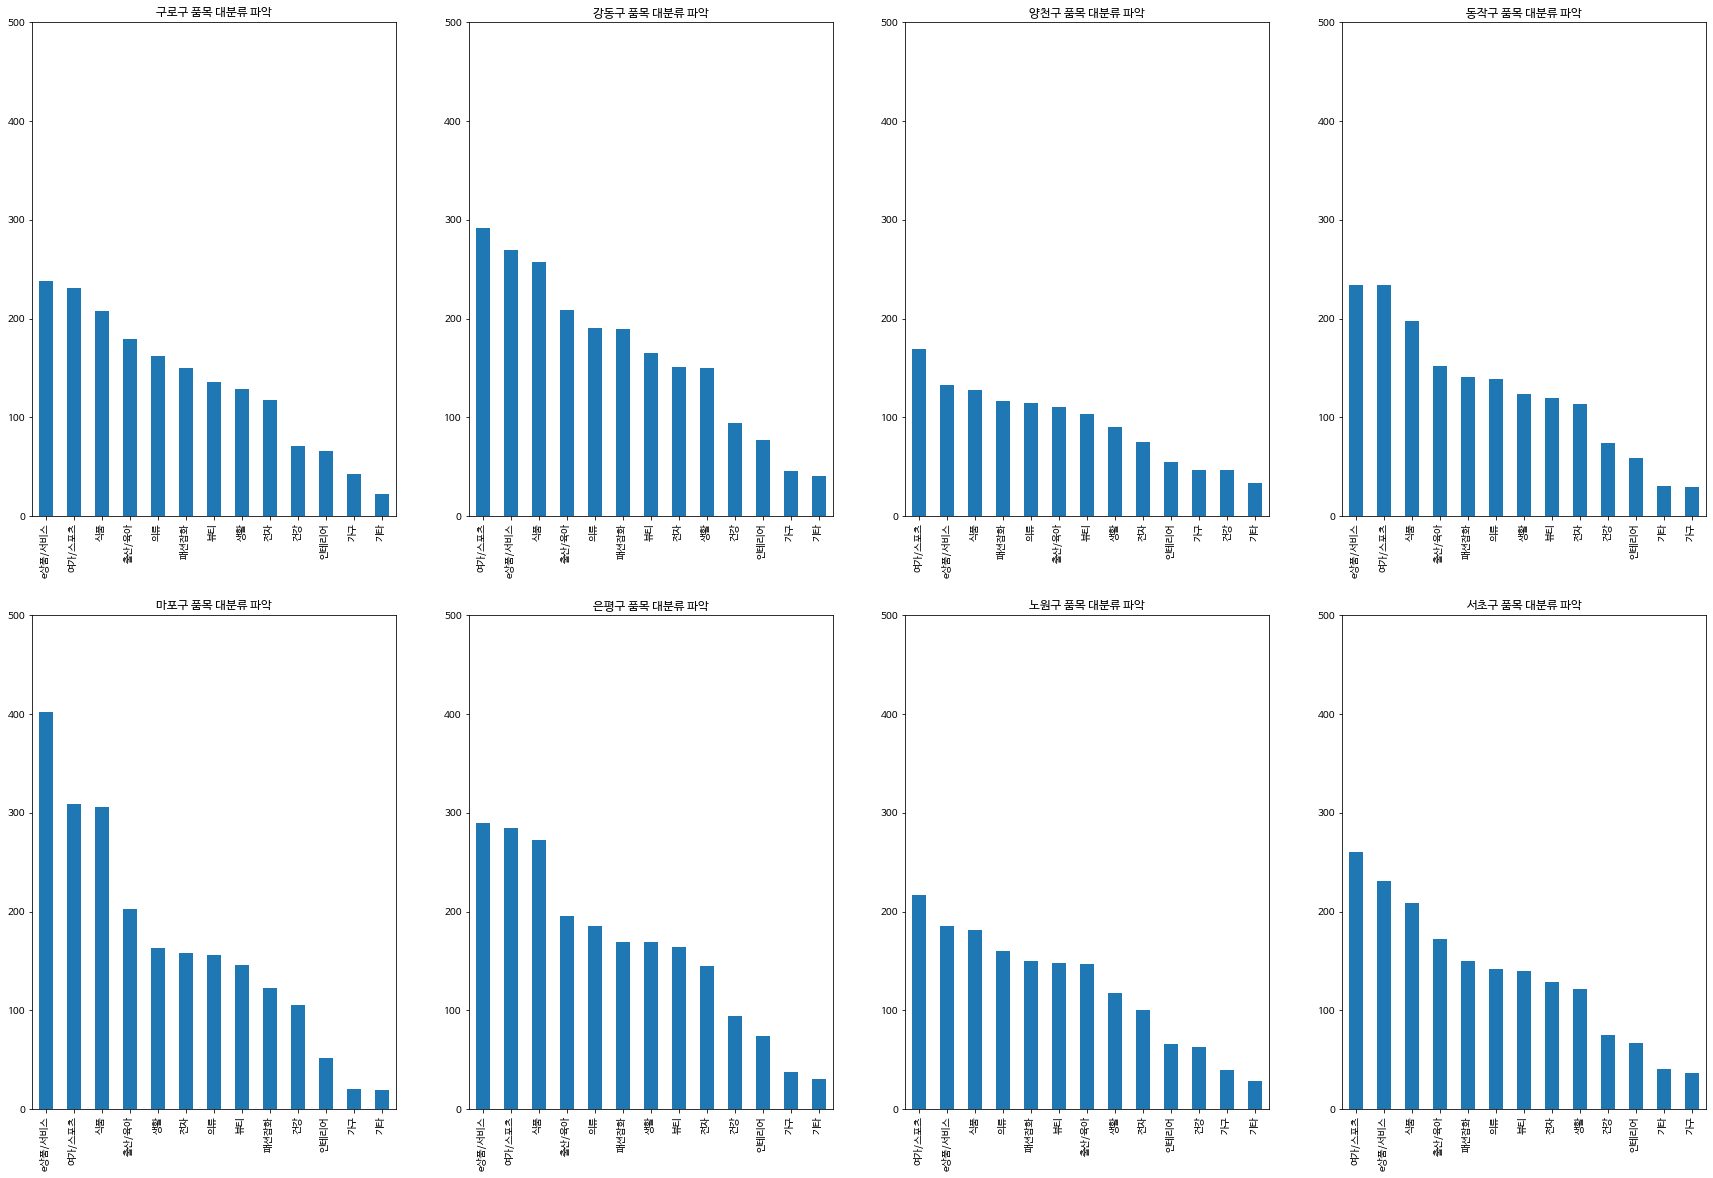

In [248]:
plt.figure(figsize = (30,20))

for j in range(len(cluster3_list)):
    plt.subplot(2,4,j+1)
    cluster3[j]['품목대분류명'].value_counts().plot.bar()
    plt.ylim([0, 500])
    plt.title(cluster3_list[j]+ ' 품목 대분류 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

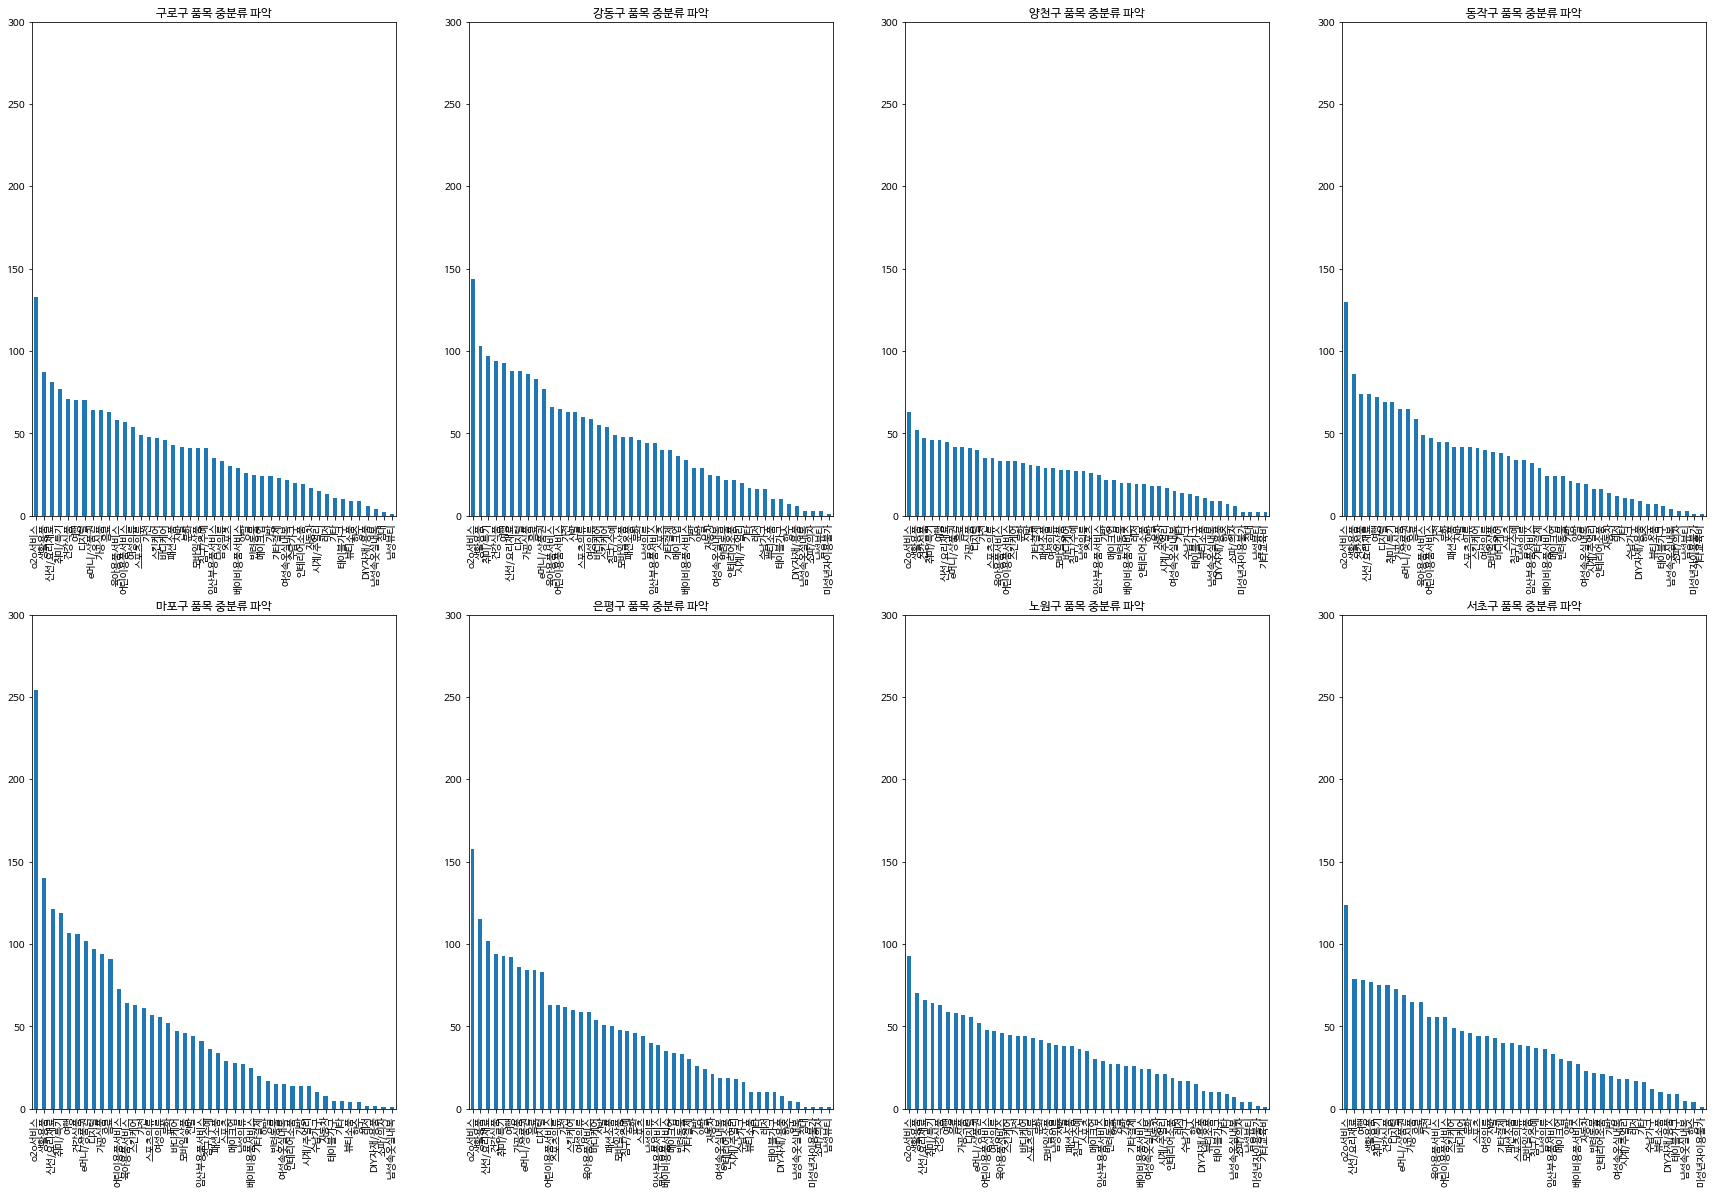

In [271]:
plt.figure(figsize = (30,20))

for j in range(len(cluster3_list)):
    plt.subplot(2,4,j+1)
    cluster3[j]['품목중분류명'].value_counts().plot.bar()
    plt.ylim([0, 300])
    plt.title(cluster3_list[j]+ ' 품목 중분류 파악')

plt.plot

In [229]:
# cluster == 4
df_1903_cluster4 = df_1903[df_1903['large_moneycount_cluster'] == 4]
cluster4_list = []
cluster4_list = df_1903_cluster4['고객소재지_시군구'].unique()

print(cluster4_list)

iscluster4 = []
for i in range(len(cluster4_list)):
    iscluster4.append(df_1903_cluster4['고객소재지_시군구'] == cluster4_list[i])
    
cluster4 = []
for i in range(len(cluster4_list)):
    cluster4.append(df_1903_cluster4[iscluster4[i]])

['강북구' '도봉구' '금천구' '성동구']


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

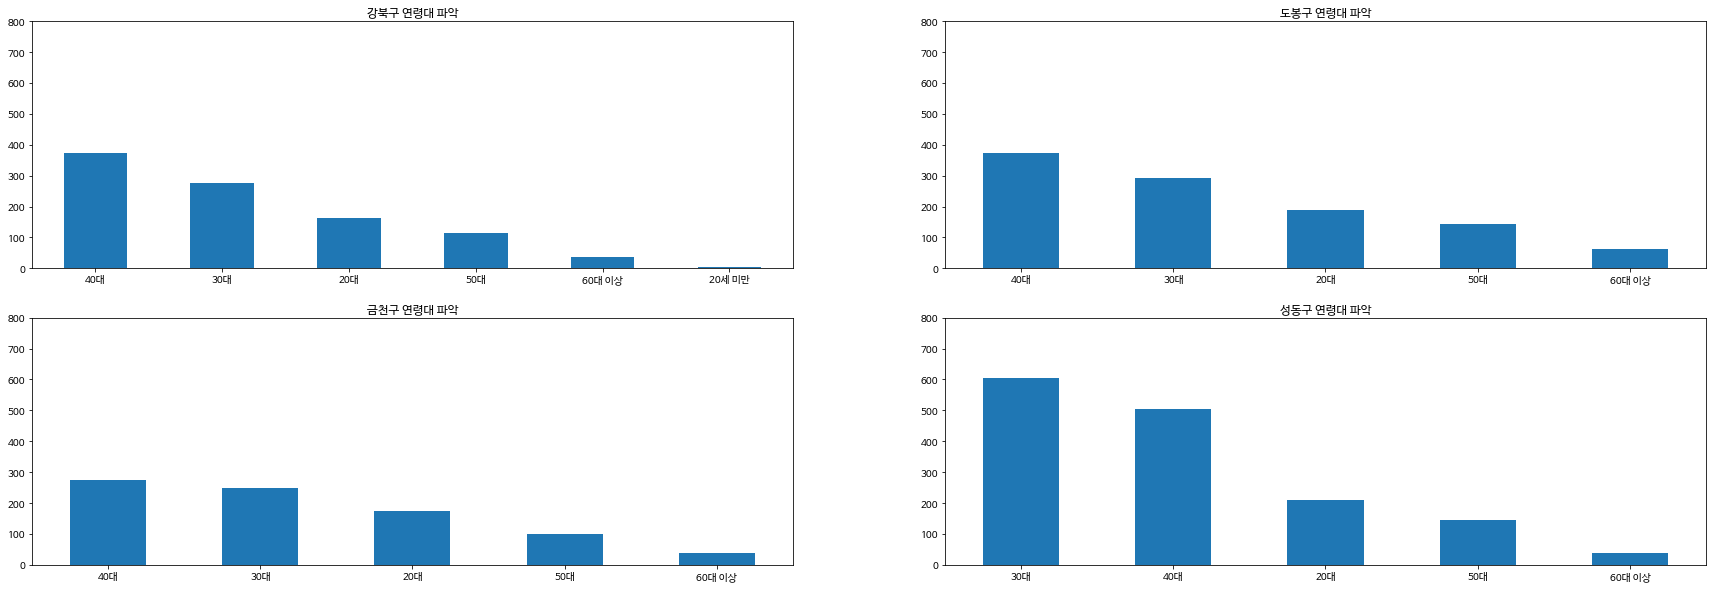

In [268]:
plt.figure(figsize = (30,10))

for j in range(len(cluster4_list)):
    plt.subplot(2,2,j+1)
    cluster4[j]['연령'].value_counts().plot.bar()
    plt.ylim([0, 800])
    plt.xticks(rotation=0)
    plt.title(cluster4_list[j]+ ' 연령대 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

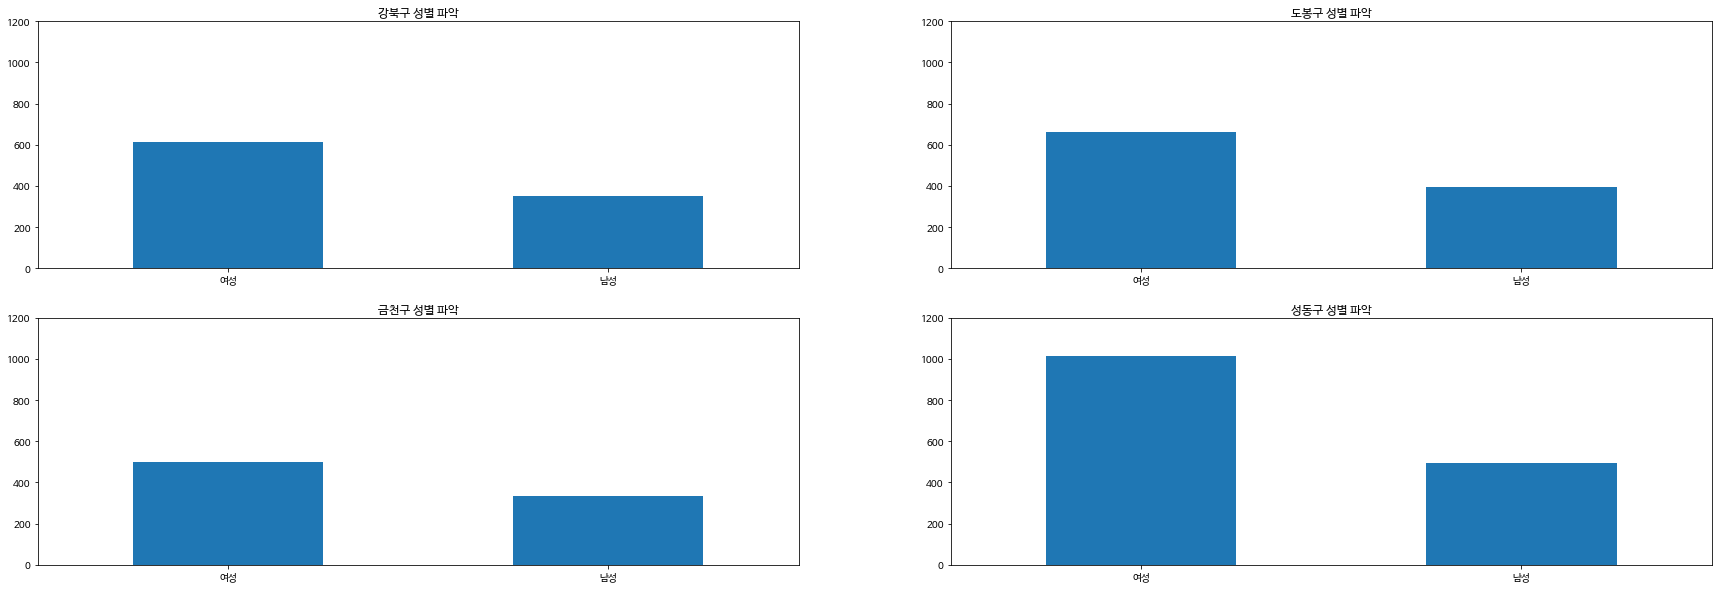

In [267]:
plt.figure(figsize = (30,10))

for j in range(len(cluster4_list)):
    plt.subplot(2,2,j+1)
    cluster4[j]['성별'].value_counts().plot.bar()
    plt.ylim([0, 1200])
    plt.xticks(rotation=0)
    plt.title(cluster4_list[j]+ ' 성별 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

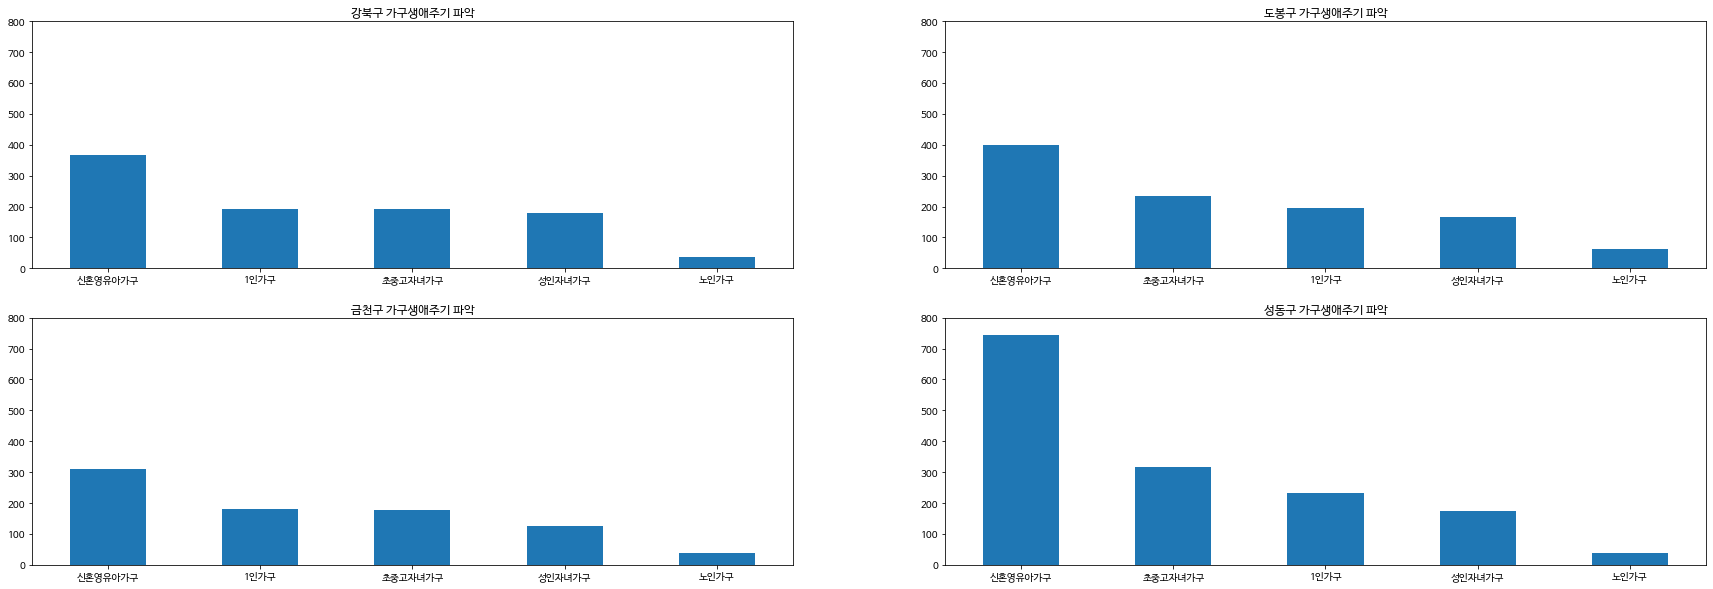

In [266]:
plt.figure(figsize = (30,10))

for j in range(len(cluster4_list)):
    plt.subplot(2,2,j+1)
    cluster4[j]['가구생애주기'].value_counts().plot.bar()
    plt.ylim([0, 800])
    plt.xticks(rotation=0)
    plt.title(cluster4_list[j]+ ' 가구생애주기 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

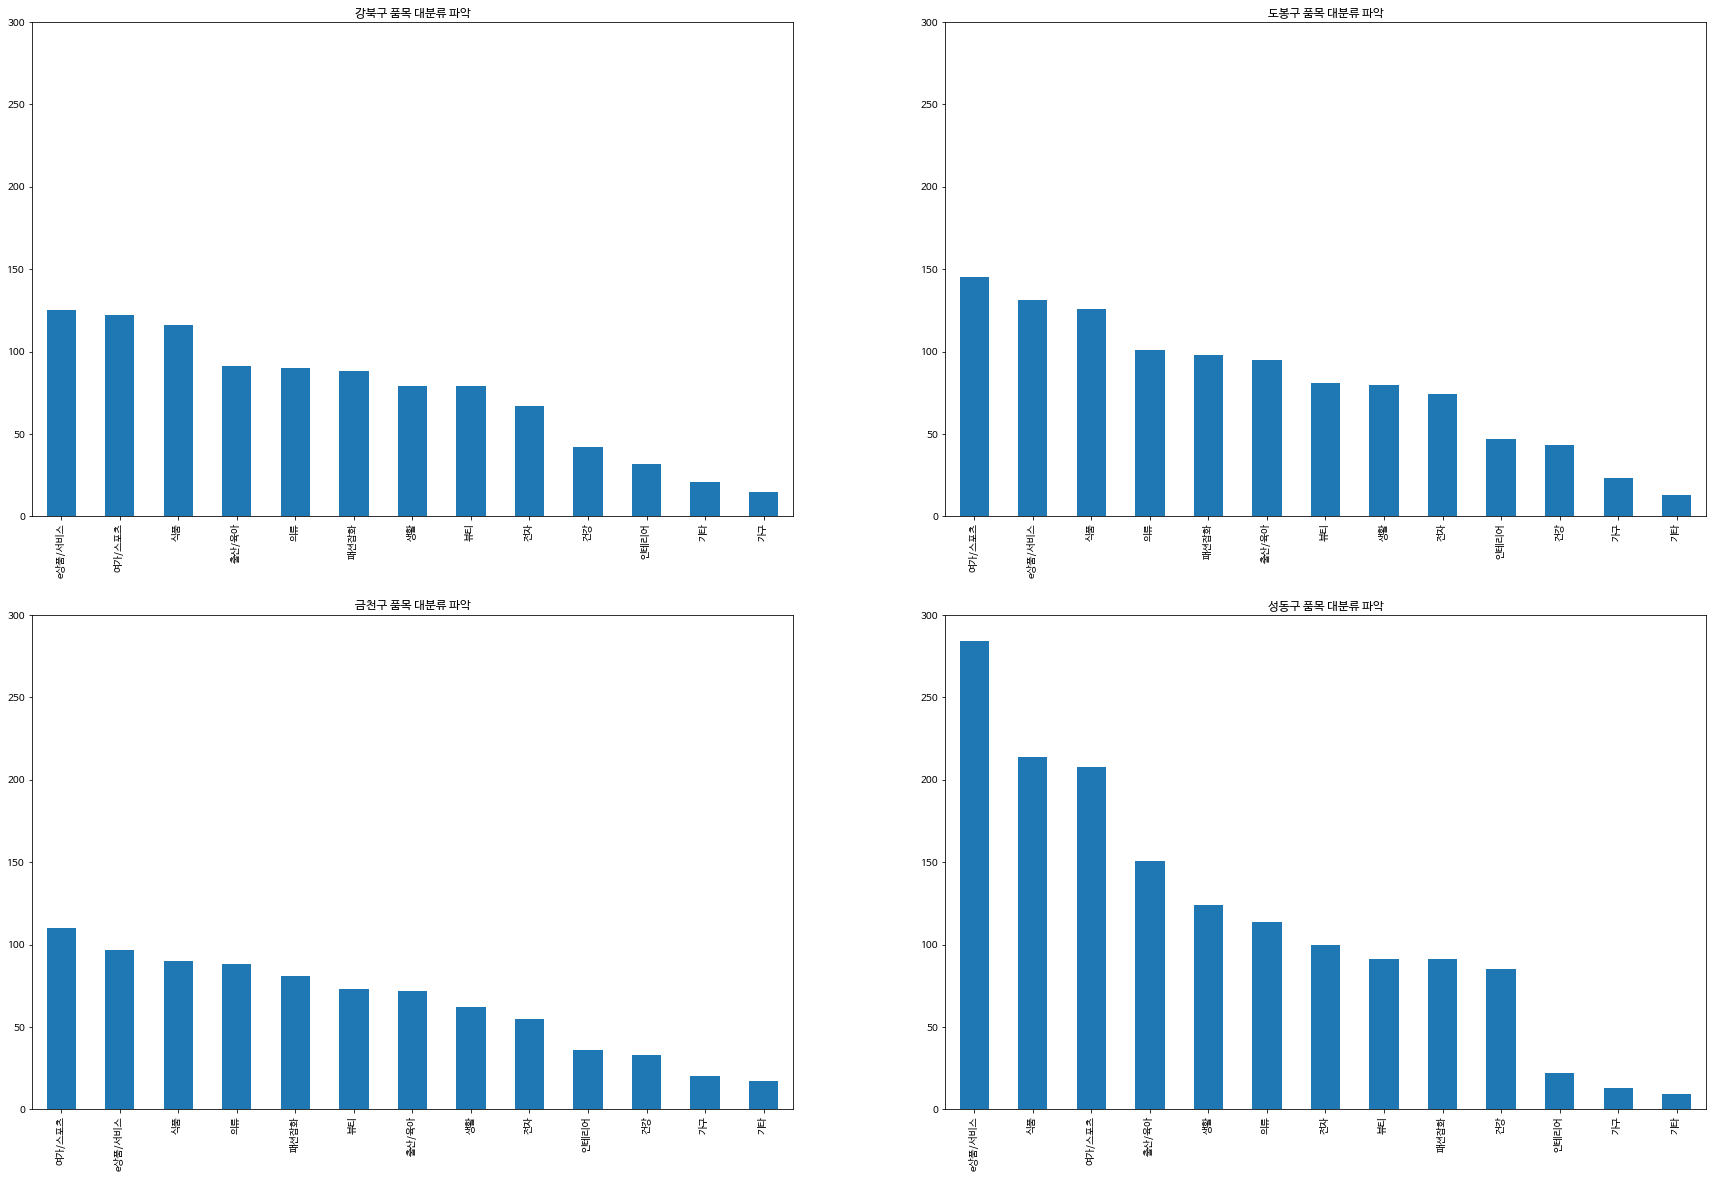

In [262]:
plt.figure(figsize = (30,20))

for j in range(len(cluster4_list)):
    plt.subplot(2,2,j+1)
    cluster4[j]['품목대분류명'].value_counts().plot.bar()
    plt.ylim([0, 300])
    plt.title(cluster4_list[j]+ ' 품목 대분류 파악')

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

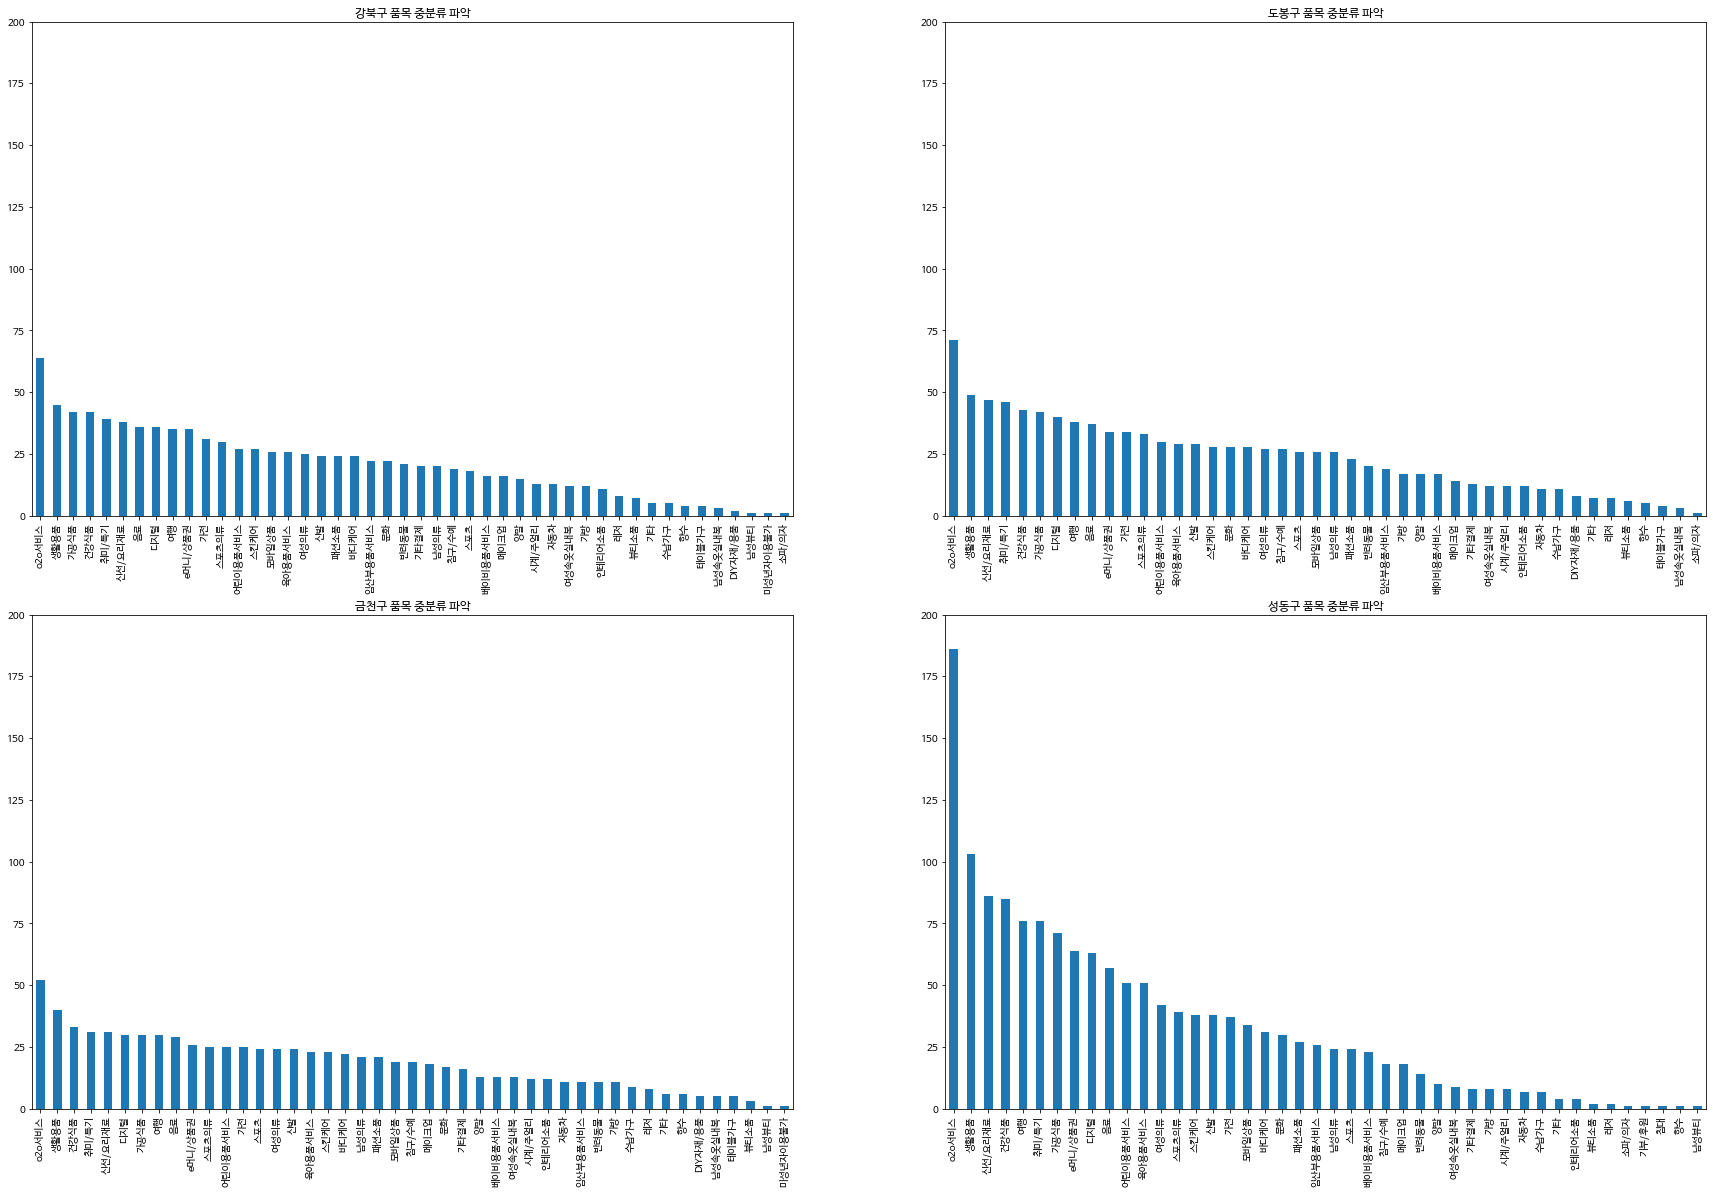

In [261]:
plt.figure(figsize = (30,20))

for j in range(len(cluster4_list)):
    plt.subplot(2,2,j+1)
    cluster4[j]['품목중분류명'].value_counts().plot.bar()
    plt.ylim([0, 200])
    plt.title(cluster4_list[j]+ ' 품목 중분류 파악')

plt.plot